# Data Cleaning & EDA 

In [317]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [516]:
df1 = pd.read_csv('coral-bleaching-events.csv')
df2 = pd.read_csv('global_bleaching_environmental.csv')
df3 = pd.read_csv('api_data_UN_14.3.csv')
df4 = pd.read_csv('api_data_UN_14.1.csv')
df5 = pd.read_csv('global-plastics-production.csv')
df6 = pd.read_csv('share-of-global-plastic-waste-emitted-to-the-ocean.csv')
df7 = pd.read_csv('plastic-waste-accumulated-in-oceans.csv')
df8 = pd.read_csv('plastic-waste-emitted-to-the-ocean.csv')
df9 = pd.read_csv('decomposition-rates-marine-debris.csv')

/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/2251839833.py:2: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('global_bleaching_environmental.csv')


### Writing functions to facilitate the cleaning

In [4]:
# Writing a function to explore each dataset

def explore_dataset(df):
    # Checking the shape of the dataset
    print("Shape of the dataset:", df.shape)
    print("\n")
    
    # Displaying the first few rows of the dataset
    print("First few rows of the dataset:")
    display(df.head())
    print("\n")
    
    # Getting information about the dataset
    print("Information about the dataset:")
    display(df.info())
    print("\n")
    
    # Checking for duplicated values per column
    duplicated_values_per_column = df.duplicated().any()
    print("Duplicated values per column:")
    display(duplicated_values_per_column)
    print("\n")
    
    # Counting duplicated values per column
    count_duplicated_values_per_column = duplicated_values_per_column.sum()
    print("Number of duplicated values per column:", count_duplicated_values_per_column)
    print("\n")
    
    # Checking for missing values
    print("Missing values per column:")
    display(df.isnull().sum())
    print("\n")
    
    # Renaming columns to lowercase
    df.rename(columns=lambda x: x.lower(), inplace=True)
    
    # Displaying number of unique values per column
    print("Number of unique values per column: ")
    display(df.nunique())

In [5]:
# Writing a function to handle missing values
def drop_columns_with_missing_values(df):
    """
    Drop columns with missing values from the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    # Drop columns with missing values in place
    df.dropna(axis=1, inplace=True)

In [181]:
# Writing a function to replace column name
def replace_column_name(df, old_column_name, new_column_name):
    """
    Replace a column name in the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    old_column_name (str): The current name of the column to be replaced.
    new_column_name (str): The new name to assign to the column.

    Returns:
    None
    """
    # Replace the column name
    df.rename(columns={old_column_name: new_column_name}, inplace=True)


In [7]:
# Writing a function to convert a column to datetime object :
def convert_to_datetime(df, columns):
    """
    Convert specified columns in the DataFrame to datetime objects.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    columns (list): A list of column names to convert to datetime.

    Returns:
    None
    """
    # Convert columns to datetime objects
    for col in columns:
        df[col] = pd.to_datetime(df[col])

In [8]:
# Writing a function to check the percentage of missing values of each column :
def missing_percentage(df):
    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ['Column_Name', 'Count']
    total_rows = df.shape[0]
    missing_df['Percentage'] = round((missing_df['Count'] / total_rows) * 100, 2)
    return missing_df

In [9]:
# Writing a function to fill in missing values with "na":
def replace_missing_with_na(df, columns):
    """
    Replace missing values in specified columns with "na".

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - columns (list): List of column names to replace missing values with "na".

    Returns:
    - DataFrame: The DataFrame with missing values replaced by "na".
    """
    df[columns] = df[columns].fillna("na")
    return df

In [190]:
# Writing a function to rename values to lowercase:
def rename_values_to_lower(df):
    """
    Rename all string/object values in the DataFrame to lowercase.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.

    Returns:
    - DataFrame: The DataFrame with string/object values renamed to lowercase.
    """
    string_columns = df.select_dtypes(include=['object']).columns
    for column in string_columns:
        df[column] = df[column].str.lower()
    return df

## First dataset : cleaning & EDA

In [11]:
# Exploring first dataset
explore_dataset(df1)

Shape of the dataset: (185, 5)


First few rows of the dataset:


,Entity,Code,Year,Moderate bleaching events (1-30% bleached),Severe bleaching events (>30% bleached)
0,Australasia,NaN,1980,3,0
1,Australasia,NaN,1981,1,0
2,Australasia,NaN,1982,0,0
3,Australasia,NaN,1983,3,1
4,Australasia,NaN,1984,1,0




Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Entity                                      185 non-null    object
 1   Code                                        37 non-null     object
 2   Year                                        185 non-null    int64 
 3   Moderate bleaching events (1-30% bleached)  185 non-null    int64 
 4   Severe bleaching events (>30% bleached)     185 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.4+ KB


None



Duplicated values per column:


False



Number of duplicated values per column: 0


Missing values per column:


Entity                                          0
Code                                          148
Year                                            0
Moderate bleaching events (1-30% bleached)      0
Severe bleaching events (>30% bleached)         0
dtype: int64



Number of unique values per column: 


entity                                         5
code                                           1
year                                          37
moderate bleaching events (1-30% bleached)    17
severe bleaching events (>30% bleached)       20
dtype: int64

In [12]:
# Replacing 'entity' by 'region'
replace_column_name(df1, 'entity', 'region')
df1

,region,code,year,moderate bleaching events (1-30% bleached),severe bleaching events (>30% bleached)
0,Australasia,NaN,1980,3,0
1,Australasia,NaN,1981,1,0
2,Australasia,NaN,1982,0,0
3,Australasia,NaN,1983,3,1
4,Australasia,NaN,1984,1,0
...,...,...,...,...,...
180,World,OWID_WRL,2012,6,1
181,World,OWID_WRL,2013,5,3
182,World,OWID_WRL,2014,9,5
183,World,OWID_WRL,2015,14,16


In [13]:
df1['region'].value_counts()

region
Australasia                 37
Indian Ocean/Middle East    37
Pacific                     37
West Atlantic               37
World                       37
Name: count, dtype: int64

In [14]:
# Define a dictionary to map region names to corresponding codes
region_to_code = {
    'World': 'WO',
    'Australasia': 'AA',
    'Indian Ocean/Middle East': 'IOME',
    'Pacific': 'PA',
    'West Atlantic': 'WA'
}

# Replace values in the "code" column based on conditions in the "region" column
for region, code in region_to_code.items():
    df1.loc[df1['region'] == region, 'code'] = code


# Check the updated DataFrame
df1

,region,code,year,moderate bleaching events (1-30% bleached),severe bleaching events (>30% bleached)
0,Australasia,AA,1980,3,0
1,Australasia,AA,1981,1,0
2,Australasia,AA,1982,0,0
3,Australasia,AA,1983,3,1
4,Australasia,AA,1984,1,0
...,...,...,...,...,...
180,World,WO,2012,6,1
181,World,WO,2013,5,3
182,World,WO,2014,9,5
183,World,WO,2015,14,16


In [15]:
# Compute summary statistics for moderate bleaching events
moderate_summary = df1['moderate bleaching events (1-30% bleached)'].describe()

# Compute summary statistics for severe bleaching events
severe_summary = df1['severe bleaching events (>30% bleached)'].describe()

# Display summary statistics
print("Summary Statistics for Moderate Bleaching Events:")
print(moderate_summary)
print("\nSummary Statistics for Severe Bleaching Events:")
print(severe_summary)

Summary Statistics for Moderate Bleaching Events:
count    185.000000
mean       3.297297
std        3.874841
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       19.000000
Name: moderate bleaching events (1-30% bleached), dtype: float64

Summary Statistics for Severe Bleaching Events:
count    185.000000
mean       3.237838
std        7.068583
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       57.000000
Name: severe bleaching events (>30% bleached), dtype: float64


In [16]:
# Filter the DataFrame for the specified years
years_of_interest = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2016]
filtered_df = df1[df1['year'].isin(years_of_interest)]

# Melt the DataFrame to long format
melted_df = filtered_df.melt(id_vars=['region', 'year'], var_name='bleaching_event_type', value_name='bleaching_events')

# Filter the melted DataFrame for moderate and severe bleaching event types
melted_df = melted_df[melted_df['bleaching_event_type'].isin(['moderate bleaching events (1-30% bleached)', 'severe bleaching events (>30% bleached)'])]

/Users/smitaprakas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/smitaprakas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/2498969147.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


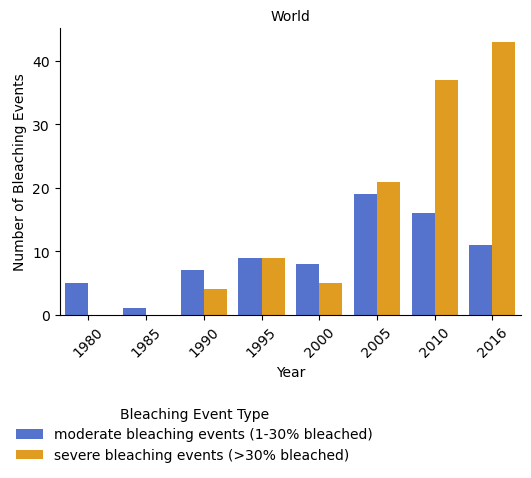

In [17]:
# World 

# Filter the melted DataFrame for the specified region
region_to_plot = 'World'
filtered_melted_df = melted_df[melted_df['region'] == region_to_plot]

palette = ["#4169E1", "#FFA500"]

# Create a FacetGrid with one barplot per region
g = sns.FacetGrid(filtered_melted_df, col='region', col_wrap=4, height=4)
g.map_dataframe(sns.barplot, x='year', y='bleaching_events', hue='bleaching_event_type', ci=None, palette=palette)
g.set_titles('{col_name}')
g.set_xlabels('Year')
g.set_ylabels('Number of Bleaching Events')
g.set_xticklabels(rotation=45)

# Add legend in the center below the plot
g.add_legend(title='Bleaching Event Type', bbox_to_anchor=(0.1, -0), loc='upper center', ncol=1)
plt.tight_layout()
plt.show()

/Users/smitaprakas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/smitaprakas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/3256297570.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


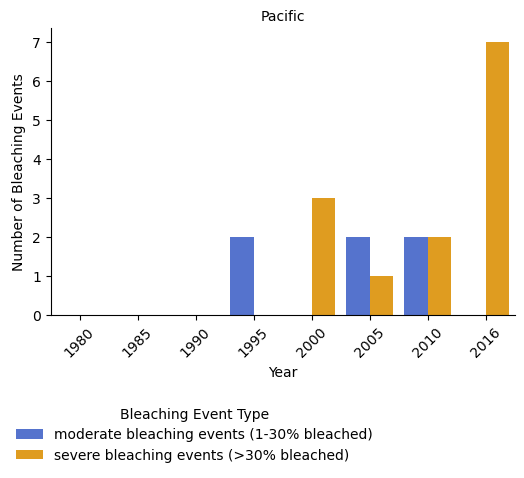

In [18]:
# Pacific

# Filter the melted DataFrame for the specified region
region_to_plot = 'Pacific'
filtered_melted_df = melted_df[melted_df['region'] == region_to_plot]

palette = ["#4169E1", "#FFA500"]

# Create a FacetGrid with one barplot per region
g = sns.FacetGrid(filtered_melted_df, col='region', col_wrap=4, height=4)
g.map_dataframe(sns.barplot, x='year', y='bleaching_events', hue='bleaching_event_type', ci=None, palette=palette)
g.set_titles('{col_name}')
g.set_xlabels('Year')
g.set_ylabels('Number of Bleaching Events')
g.set_xticklabels(rotation=45)

# Add legend in the center below the plot
g.add_legend(title='Bleaching Event Type', bbox_to_anchor=(0.1, -0), loc='upper center', ncol=1)
plt.tight_layout()
plt.show()

/Users/smitaprakas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/smitaprakas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/3333890091.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


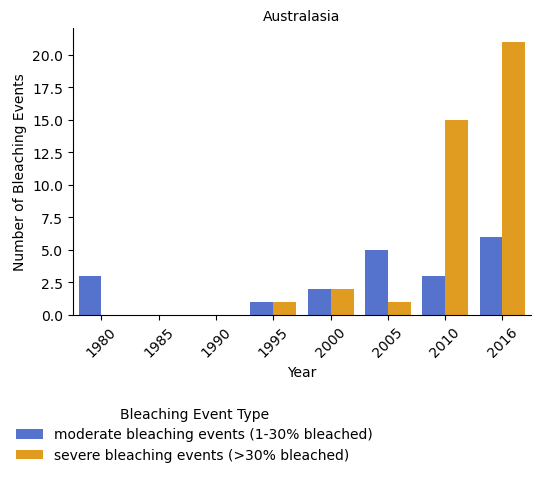

In [19]:
# Australasia

# Filter the melted DataFrame for the specified region
region_to_plot = 'Australasia'
filtered_melted_df = melted_df[melted_df['region'] == region_to_plot]

palette = ["#4169E1", "#FFA500"]

# Create a FacetGrid with one barplot per region
g = sns.FacetGrid(filtered_melted_df, col='region', col_wrap=4, height=4)
g.map_dataframe(sns.barplot, x='year', y='bleaching_events', hue='bleaching_event_type', ci=None, palette=palette)
g.set_titles('{col_name}')
g.set_xlabels('Year')
g.set_ylabels('Number of Bleaching Events')
g.set_xticklabels(rotation=45)

# Add legend in the center below the plot
g.add_legend(title='Bleaching Event Type', bbox_to_anchor=(0.1, -0), loc='upper center', ncol=1)
plt.tight_layout()
plt.show()

/Users/smitaprakas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/smitaprakas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/556128558.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


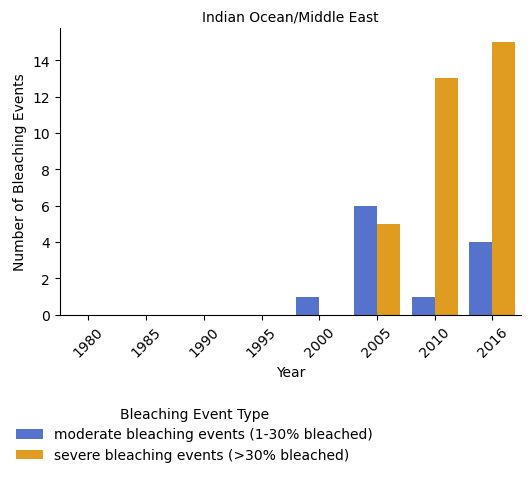

In [20]:
# Indian Ocean/Middle East

# Filter the melted DataFrame for the specified region
region_to_plot = 'Indian Ocean/Middle East'
filtered_melted_df = melted_df[melted_df['region'] == region_to_plot]

palette = ["#4169E1", "#FFA500"]

# Create a FacetGrid with one barplot per region
g = sns.FacetGrid(filtered_melted_df, col='region', col_wrap=4, height=4)
g.map_dataframe(sns.barplot, x='year', y='bleaching_events', hue='bleaching_event_type', ci=None, palette=palette)
g.set_titles('{col_name}')
g.set_xlabels('Year')
g.set_ylabels('Number of Bleaching Events')
g.set_xticklabels(rotation=45)

# Add legend in the center below the plot
g.add_legend(title='Bleaching Event Type', bbox_to_anchor=(0.1, -0), loc='upper center', ncol=1)
plt.tight_layout()
plt.show()

/Users/smitaprakas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/smitaprakas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/3312569895.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


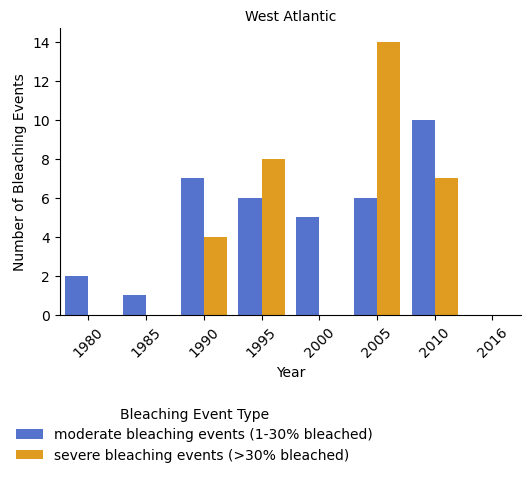

In [21]:
# West Atlantic 

# Filter the melted DataFrame for the specified region
region_to_plot = 'West Atlantic'
filtered_melted_df = melted_df[melted_df['region'] == region_to_plot]

palette = ["#4169E1", "#FFA500"]

# Create a FacetGrid with one barplot per region
g = sns.FacetGrid(filtered_melted_df, col='region', col_wrap=4, height=4)
g.map_dataframe(sns.barplot, x='year', y='bleaching_events', hue='bleaching_event_type', ci=None, palette=palette)
g.set_titles('{col_name}')
g.set_xlabels('Year')
g.set_ylabels('Number of Bleaching Events')
g.set_xticklabels(rotation=45)

# Add legend in the center below the plot
g.add_legend(title='Bleaching Event Type', bbox_to_anchor=(0.1, -0), loc='upper center', ncol=1)
plt.tight_layout()
plt.show()

In [22]:
# Exporting the cleaned Dataframe to csv format :
df1.to_csv('coral-bleaching-events-per-year.csv', index=False)

## Second dataset : cleaning & EDA

In [319]:
# Exploring second dataset
explore_dataset(df2)

Shape of the dataset: (41361, 62)


First few rows of the dataset:


,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,nd,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5,0,0,0.74,7.25,0.18,2005-09-15,nd,nd,nd
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,nd,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4,0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,nd
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7,0,0,1.04,11.66,0.26,2006-01-15,nd,nd,nd
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4,0,0,0.75,5.64,0.2,2006-04-15,nd,nd,nd
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5,0,0,0.92,6.89,0.25,2006-04-15,nd,nd,nd




Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                41361 non-null  int64  
 1   Sample_ID                              41361 non-null  int64  
 2   Data_Source                            41361 non-null  object 
 3   Latitude_Degrees                       41361 non-null  float64
 4   Longitude_Degrees                      41361 non-null  float64
 5   Ocean_Name                             41361 non-null  object 
 6   Reef_ID                                41361 non-null  object 
 7   Realm_Name                             41361 non-null  object 
 8   Ecoregion_Name                         41361 non-null  object 
 9   Country_Name                           41361 non-null  object 
 10  State_Island_Province_Name           

None



Duplicated values per column:


False



Number of duplicated values per column: 0


Missing values per column:


Site_ID               0
Sample_ID             0
Data_Source           0
Latitude_Degrees      0
Longitude_Degrees     0
                     ..
TSA_DHWMean           0
Date                  0
Site_Comments         0
Sample_Comments       0
Bleaching_Comments    0
Length: 62, dtype: int64



Number of unique values per column: 


site_id               12702
sample_id             27005
data_source               9
latitude_degrees      11066
longitude_degrees     11025
                      ...  
tsa_dhwmean             250
date                   5212
site_comments           862
sample_comments        1305
bleaching_comments        8
Length: 62, dtype: int64

In [320]:
# As we can see, there are no missing values, however, the string "nd" is used instead
# Let's convert it to 'NaN' so we can deal easily with actual missing values

df2.replace('nd', np.nan, inplace=True)

In [321]:
# Let's check again for missing values 
df2.isnull().sum()

site_id                   0
sample_id                 0
data_source               0
latitude_degrees          0
longitude_degrees         0
                      ...  
tsa_dhwmean             132
date                      0
site_comments         39104
sample_comments       38403
bleaching_comments    38692
Length: 62, dtype: int64

In [322]:
# For each column that contains missing values, let's check the percentage using the above function that we've written

missing_df = missing_percentage(df2)
missing_df.sort_values(by='Percentage', ascending=False).head(20)


,Column_Name,Count,Percentage
59,site_comments,39104,94.54
61,bleaching_comments,38692,93.55
60,sample_comments,38403,92.85
12,site_name,34429,83.24
23,bleaching_level,18830,45.53
21,substrate_name,12668,30.63
6,reef_id,12540,30.32
22,percent_cover,12455,30.11
24,percent_bleaching,6846,16.55
20,depth_m,1799,4.35


In [323]:
# Let's start by dropping columns that have more than 80% missing values and those that do not have any relevant information for further analysis
columns_to_drop_df2 = [
    'data_source', 'reef_id', 'date_day', 'date_month','depth_m',
    'bleaching_level', 'temperature_kelvin_standard_deviation','site_name',
    'ssta_standard_deviation', 'ssta_mean', 'ssta_minimum', 'ssta_maximum',
    'ssta_frequency', 'ssta_frequency_standard_deviation', 'ssta_frequencymax',
    'ssta_frequencymean', 'ssta_dhw', 'ssta_dhw_standard_deviation', 'ssta_dhwmax',
    'ssta_dhwmean', 'tsa_standard_deviation', 'tsa_minimum', 'tsa_maximum',
    'tsa_mean', 'tsa_frequency', 'tsa_frequency_standard_deviation', 'tsa_frequencymax',
    'tsa_frequencymean', 'tsa_dhw', 'tsa_dhw_standard_deviation', 'tsa_dhwmax',
    'tsa_dhwmean', 'site_comments', 'sample_comments', 'bleaching_comments', 'tsa'
]
 
# Drop the specified columns from the DataFrame
df2.drop(columns=columns_to_drop_df2, axis=1, inplace=True)

In [324]:
# Again, for each column that contains missing values, let's check the percentage 

missing_df2 = missing_percentage(df2)
missing_df2.sort_values(by='Percentage', ascending=False).head(20)

,Column_Name,Count,Percentage
15,substrate_name,12668,30.63
16,percent_cover,12455,30.11
17,percent_bleaching,6846,16.55
9,city_town_name,1133,2.74
24,ssta,148,0.36
19,temperature_kelvin,148,0.36
22,temperature_maximum,132,0.32
21,temperature_minimum,132,0.32
20,temperature_mean,132,0.32
23,windspeed,129,0.31


In [325]:
# Let's also handle missing values for the columns that have less or equals to 35% missing values
rows_to_drop = missing_df2[missing_df2['Percentage'] <= 35]['Column_Name'].tolist()
rows_to_drop

df2.dropna(subset=rows_to_drop, inplace=True)


In [326]:
# Let's check if we still have any remaining missing values
df2.isnull().sum()

site_id                       0
sample_id                     0
latitude_degrees              0
longitude_degrees             0
ocean_name                    0
realm_name                    0
ecoregion_name                0
country_name                  0
state_island_province_name    0
city_town_name                0
distance_to_shore             0
exposure                      0
turbidity                     0
cyclone_frequency             0
date_year                     0
substrate_name                0
percent_cover                 0
percent_bleaching             0
climsst                       0
temperature_kelvin            0
temperature_mean              0
temperature_minimum           0
temperature_maximum           0
windspeed                     0
ssta                          0
date                          0
dtype: int64

In [327]:
# Let's clean some of the column names
df2.rename(columns={
    'date_year': 'year',
    'ocean_name': 'ocean',
    'realm_name': 'realm',
    'ecoregion_name': 'ecoregion',
    'country_name' : 'country',
    'state_island_province_name': 'state_island_province',
    'city_town_name': 'city_town',
    'temperature_minimum': 'temperature_min',
    'temperature_maximum': 'temperature_max'
    }, inplace=True)

In [328]:
df2.dtypes

site_id                    int64
sample_id                  int64
latitude_degrees         float64
longitude_degrees        float64
ocean                     object
realm                     object
ecoregion                 object
country                   object
state_island_province     object
city_town                 object
distance_to_shore         object
exposure                  object
turbidity                 object
cyclone_frequency        float64
year                       int64
substrate_name            object
percent_cover             object
percent_bleaching         object
climsst                   object
temperature_kelvin        object
temperature_mean          object
temperature_min           object
temperature_max           object
windspeed                 object
ssta                      object
date                      object
dtype: object

In [329]:
# Let's convert numerical columns to 'float' or 'int'

df2[['percent_cover', 'percent_bleaching', 'temperature_kelvin', 'temperature_min', 'temperature_max', 'ssta', 'windspeed']] = df2[['percent_cover', 'percent_bleaching', 'temperature_kelvin', 'temperature_min', 'temperature_max', 'ssta', 'windspeed']].apply(pd.to_numeric, errors='coerce')

In [330]:
df2.dtypes

site_id                    int64
sample_id                  int64
latitude_degrees         float64
longitude_degrees        float64
ocean                     object
realm                     object
ecoregion                 object
country                   object
state_island_province     object
city_town                 object
distance_to_shore         object
exposure                  object
turbidity                 object
cyclone_frequency        float64
year                       int64
substrate_name            object
percent_cover            float64
percent_bleaching        float64
climsst                   object
temperature_kelvin       float64
temperature_mean          object
temperature_min          float64
temperature_max          float64
windspeed                  int64
ssta                     float64
date                      object
dtype: object

In [331]:
# Let's add a new 'bleaching_status' column to our DataFrame for visualizations purpose
def bleaching_status(percent):
    if percent == 0:
        return 'Unbleached'
    elif percent <= 30:
        return 'Moderate'
    else:
        return 'Severe'

df2['bleaching_status'] = df2['percent_bleaching'].apply(bleaching_status)

In [332]:
df2

,site_id,sample_id,latitude_degrees,longitude_degrees,ocean,realm,ecoregion,country,state_island_province,city_town,...,percent_bleaching,climsst,temperature_kelvin,temperature_mean,temperature_min,temperature_max,windspeed,ssta,date,bleaching_status
6981,7,10313996,-19.1219,146.8808,Pacific,Central Indo-Pacific,Central and northern Great Barrier Reef,Australia,Queensland,Magnetic Island,...,0.0,300.52,298.19,299.07,292.20,305.77,7,-0.32,2006-10-08,Unbleached
6982,7,10313996,-19.1219,146.8808,Pacific,Central Indo-Pacific,Central and northern Great Barrier Reef,Australia,Queensland,Magnetic Island,...,0.0,300.52,298.19,299.07,292.20,305.77,7,-0.32,2006-10-08,Unbleached
6989,9,10314035,-18.7979,147.5206,Pacific,Central Indo-Pacific,Central and northern Great Barrier Reef,Australia,Queensland,Great Barrier Reef Marine Park,...,0.0,298.87,299.51,299.19,294.01,304.44,5,-0.93,2008-04-02,Unbleached
6990,9,10314035,-18.7979,147.5206,Pacific,Central Indo-Pacific,Central and northern Great Barrier Reef,Australia,Queensland,Great Barrier Reef Marine Park,...,0.0,298.87,299.51,299.19,294.01,304.44,5,-0.93,2008-04-02,Unbleached
6991,10,10314059,-18.7974,147.5200,Pacific,Central Indo-Pacific,Central and northern Great Barrier Reef,Australia,Queensland,Great Barrier Reef Marine Park,...,0.0,296.66,297.04,299.19,294.01,304.44,6,0.42,2017-07-09,Unbleached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35037,3577,10314534,-16.5427,-151.7408,Pacific,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,Society Islands,Bora Bora,...,100.0,300.47,301.97,300.89,297.92,304.77,5,0.52,2019-05-05,Severe
35038,8312,10321370,10.1167,99.8444,Pacific,Central Indo-Pacific,Gulf of Thailand,Thailand,Surat Thani,Ko Pha-ngan District,...,100.0,302.47,304.79,302,297.17,306.89,2,1.40,2014-05-27,Severe
35039,8312,10321370,10.1167,99.8444,Pacific,Central Indo-Pacific,Gulf of Thailand,Thailand,Surat Thani,Ko Pha-ngan District,...,100.0,302.47,304.79,302,297.17,306.89,2,1.40,2014-05-27,Severe
35040,9436,10318964,18.3350,-64.8486,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,St Thomas,...,100.0,300.97,302.11,300.34,297.58,303.67,8,0.32,2005-10-23,Severe


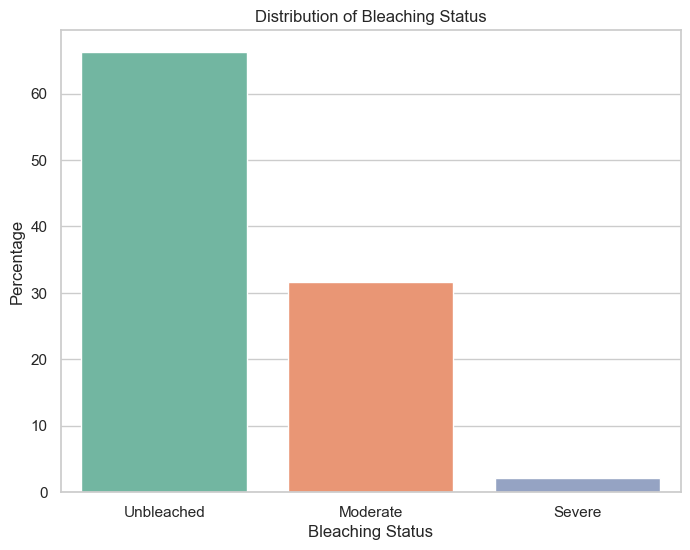

In [333]:
# Plotting the distribution of bleaching_status

# Calculate the percentage of each category
percentage_df = df2['bleaching_status'].value_counts(normalize=True) * 100

# Plotting the distribution of bleaching_status with percentage
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_df.index, y=percentage_df.values, palette='Set2')  # Using the 'Set2' palette
plt.title('Distribution of Bleaching Status')
plt.xlabel('Bleaching Status')
plt.ylabel('Percentage')
plt.show()


In [334]:
df2['bleaching_status'].value_counts()

bleaching_status
Unbleached    14464
Moderate       6922
Severe          450
Name: count, dtype: int64

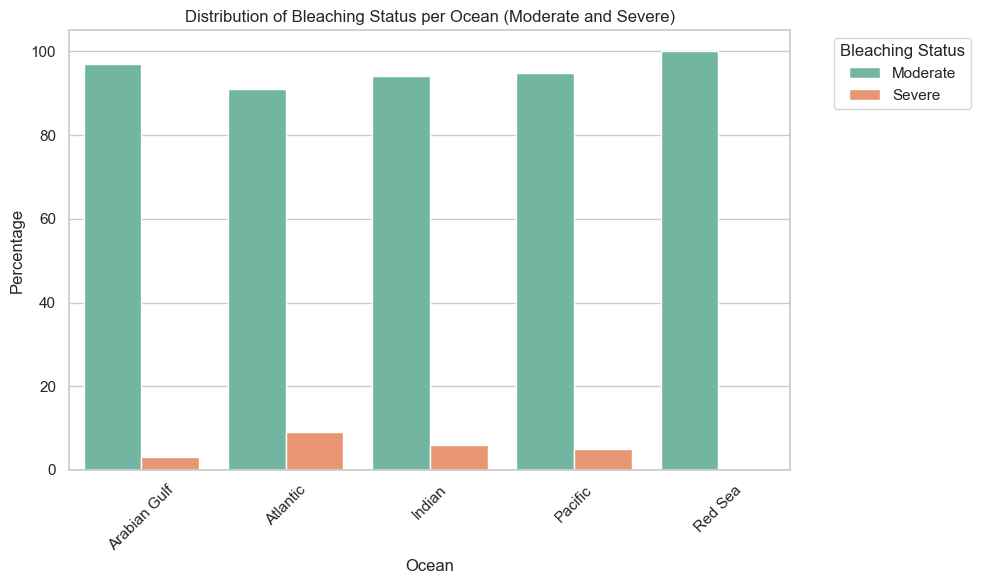

In [335]:
# Filter the DataFrame for rows where bleaching_status is 'moderate' or 'severe'
filtered_df2 = df2[df2['bleaching_status'].isin(['Moderate', 'Severe'])]

# Calculate the percentage of each category per ocean
percentage_df2 = filtered_df2.groupby(['ocean', 'bleaching_status']).size() / filtered_df2.groupby('ocean').size() * 100

# Reset index to make 'ocean' and 'bleaching_status' columns again
percentage_df2 = percentage_df2.reset_index(name='percentage')

# Plotting the distribution of bleaching_status per ocean
plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_df2, x='ocean', y='percentage', hue='bleaching_status', palette='Set2')
plt.title('Distribution of Bleaching Status per Ocean (Moderate and Severe)')
plt.xlabel('Ocean')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Bleaching Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


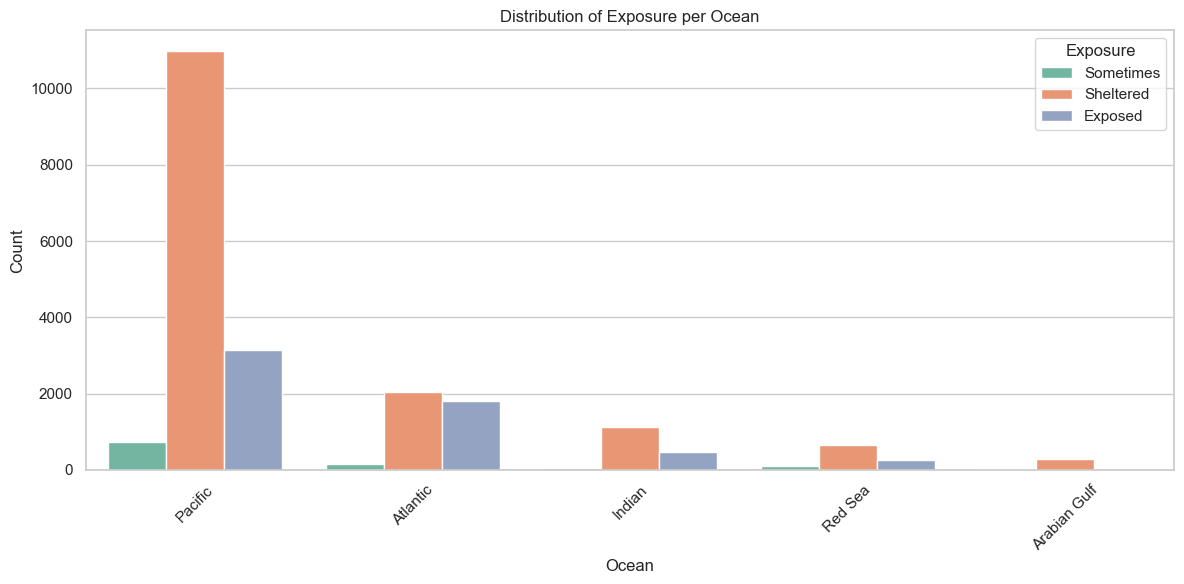

In [336]:
# Plotting the distribution of exposure column per ocean
plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='ocean', hue='exposure', palette='Set2')
plt.title('Distribution of Exposure per Ocean')
plt.xlabel('Ocean')
plt.ylabel('Count')
plt.legend(title='Exposure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [337]:
# Percent Cover per Realm

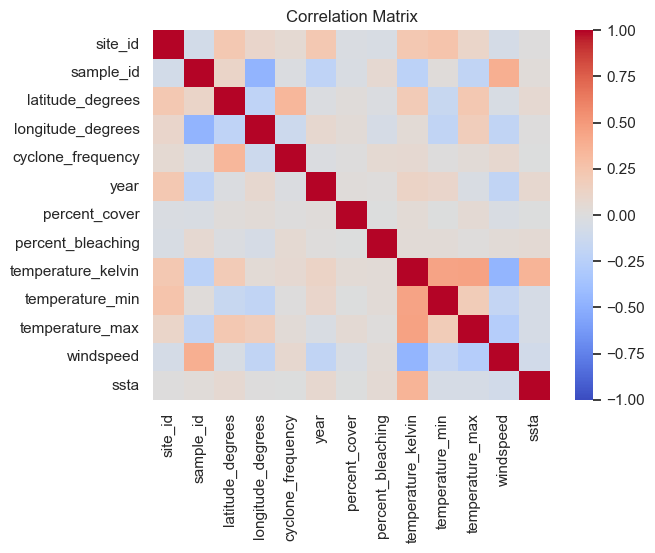

In [357]:
# Select only numeric columns
numeric_columns = df2.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", vmin=-1)
plt.title('Correlation Matrix')
plt.show()

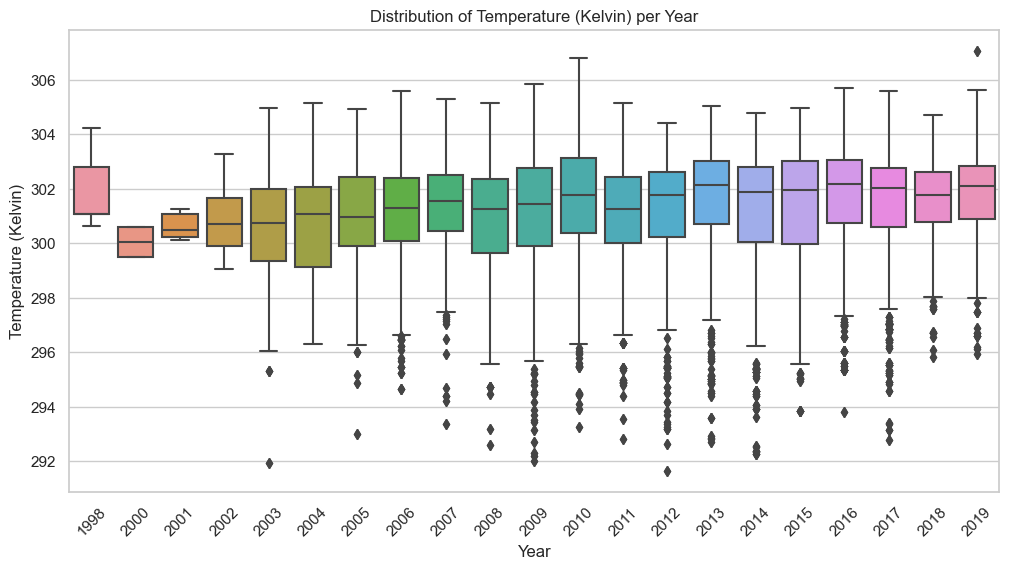

In [339]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot the distribution of temperature_kelvin per year using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, x='year', y='temperature_kelvin')
plt.title('Distribution of Temperature (Kelvin) per Year')
plt.xlabel('Year')
plt.ylabel('Temperature (Kelvin)')
plt.xticks(rotation=45)
plt.show()

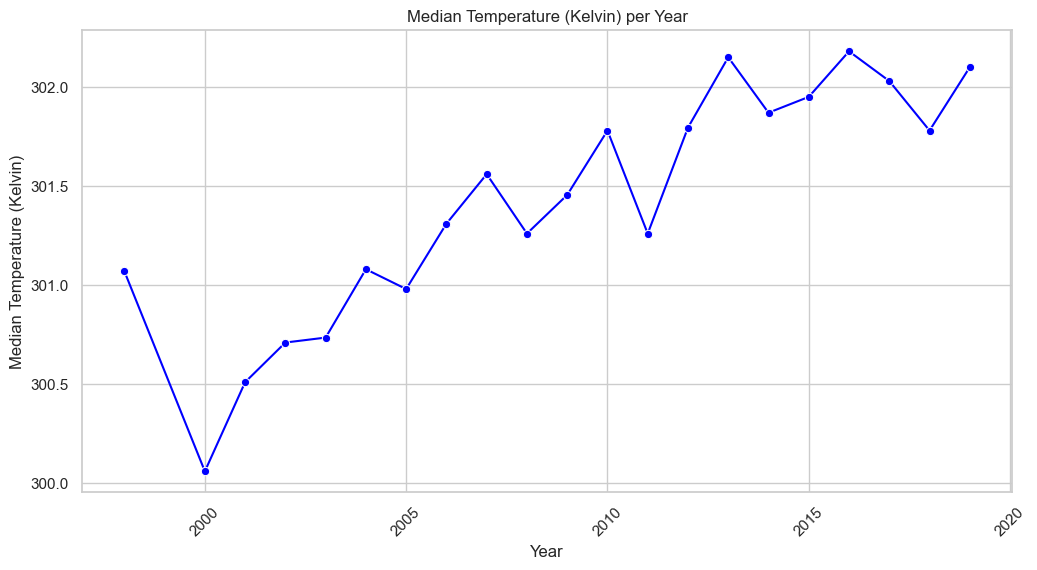

In [340]:
# Calculate the median temperature per year
median_temp_per_year = df2.groupby('year')['temperature_kelvin'].median().reset_index()

# Plot the median temperature per year using a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=median_temp_per_year, x='year', y='temperature_kelvin', marker='o', color='blue')
plt.title('Median Temperature (Kelvin) per Year')
plt.xlabel('Year')
plt.ylabel('Median Temperature (Kelvin)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

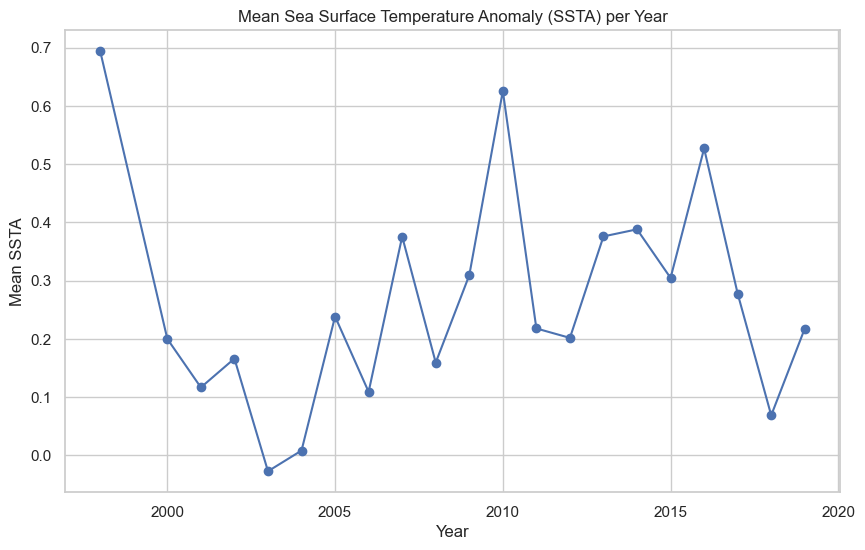

In [341]:
# Group by 'year' and calculate the mean SSTA for each year
mean_ssta_per_year = df2.groupby('year')['ssta'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_ssta_per_year.index, mean_ssta_per_year.values, marker='o', linestyle='-')
plt.title('Mean Sea Surface Temperature Anomaly (SSTA) per Year')
plt.xlabel('Year')
plt.ylabel('Mean SSTA')
plt.grid(True)
plt.show()

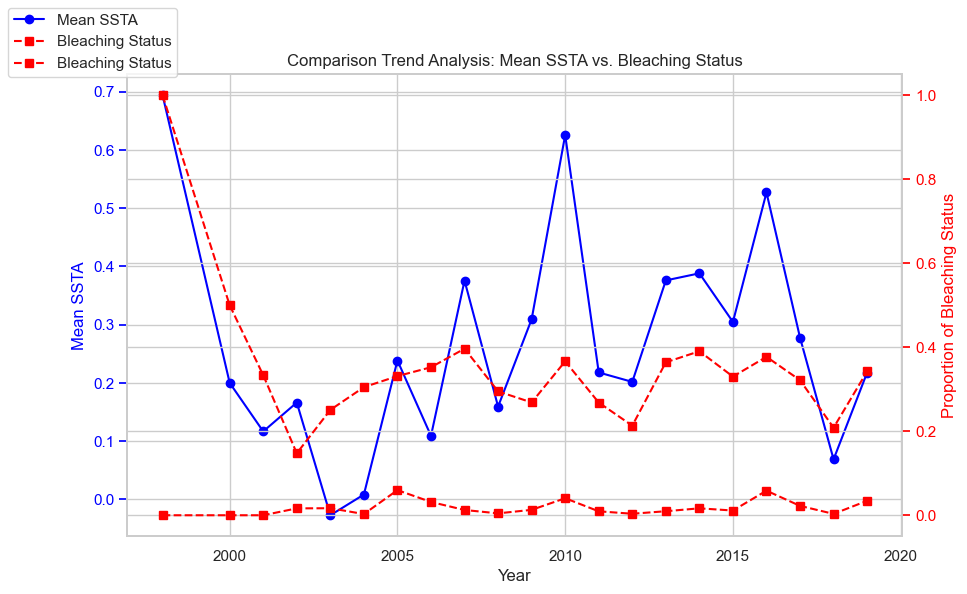

In [343]:
# Calculate mean SSTA per year
mean_ssta_per_year = df2.groupby('year')['ssta'].mean()

# Calculate proportion of bleaching status per year
bleaching_status_proportion = df2.groupby(['year', 'bleaching_status']).size().unstack(fill_value=0)
bleaching_status_proportion = bleaching_status_proportion.div(bleaching_status_proportion.sum(axis=1), axis=0)

# Merge data
merged_data = pd.merge(mean_ssta_per_year, bleaching_status_proportion, on='year')

# Plot comparison trend analysis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot mean SSTA
ax1.plot(merged_data.index, merged_data['ssta'], color='blue', marker='o', label='Mean SSTA')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean SSTA', color='blue')
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis for bleaching status
ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data[['Moderate', 'Severe']], color='red', linestyle='--', marker='s', label='Bleaching Status')
ax2.set_ylabel('Proportion of Bleaching Status', color='red')
ax2.tick_params('y', colors='red')

# Show legend
fig.legend(loc="upper left")

plt.title('Comparison Trend Analysis: Mean SSTA vs. Bleaching Status')
plt.show()


In [344]:
merged_data

,ssta,Moderate,Severe,Unbleached
year,,,,
1998,0.694000,1.000000,0.000000,0.000000
2000,0.200000,0.500000,0.000000,0.500000
2001,0.116667,0.333333,0.000000,0.666667
2002,0.166230,0.147541,0.016393,0.836066
2003,-0.027291,0.250836,0.016722,0.732441
2004,0.008255,0.304965,0.002837,0.692199
2005,0.238466,0.331288,0.059816,0.608896
2006,0.109064,0.352369,0.031592,0.616039
2007,0.375752,0.396552,0.012539,0.590909


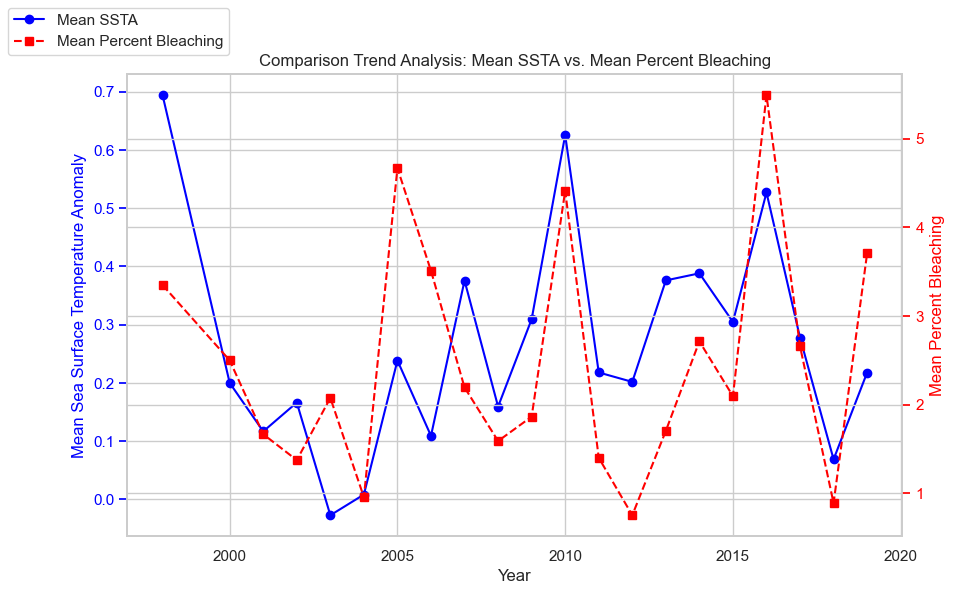

In [350]:
# Calculate median temperature Kelvin per year
mean_temp_kelvin_per_year = df2.groupby('year')['ssta'].mean()

# Calculate mean percentage of bleaching per year
mean_percent_bleaching_per_year = df2.groupby('year')['percent_bleaching'].mean()

# Merge data
merged_data = pd.merge(mean_temp_kelvin_per_year, mean_percent_bleaching_per_year, on='year')

# Plot comparison trend analysis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot median temperature Kelvin
ax1.plot(merged_data.index, merged_data['ssta'], color='blue', marker='o', label='Mean SSTA')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Sea Surface Temperature Anomaly', color='blue')
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis for percentage of bleaching
ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data['percent_bleaching'], color='red', linestyle='--', marker='s', label='Mean Percent Bleaching')
ax2.set_ylabel('Mean Percent Bleaching', color='red')
ax2.tick_params('y', colors='red')

# Show legend
fig.legend(loc="upper left")

plt.title('Comparison Trend Analysis: Mean SSTA vs. Mean Percent Bleaching')
plt.show()



In [355]:
merged_data.corr()

,ssta,percent_bleaching
ssta,1.000000,0.566184
percent_bleaching,0.566184,1.000000


In [346]:
df2.to_csv('global_bleaching_env.csv', index=False)

In [352]:
df2.dtypes

site_id                    int64
sample_id                  int64
latitude_degrees         float64
longitude_degrees        float64
ocean                     object
realm                     object
ecoregion                 object
country                   object
state_island_province     object
city_town                 object
distance_to_shore         object
exposure                  object
turbidity                 object
cyclone_frequency        float64
year                       int64
substrate_name            object
percent_cover            float64
percent_bleaching        float64
climsst                   object
temperature_kelvin       float64
temperature_mean          object
temperature_min          float64
temperature_max          float64
windspeed                  int64
ssta                     float64
date                      object
bleaching_status          object
dtype: object

### Connection to SQL

In [347]:
import pandas as pd
from sqlalchemy import create_engine , text



pw_raw ='SQL2024!'#os.getenv('mysql_pass')
connection_string = 'mysql+pymysql://root:' + pw_raw + '@localhost:3306/'
engine = create_engine(connection_string)

with engine.connect() as conn:
    conn.execute(text(f"CREATE DATABASE IF NOT EXISTS final_project"))

df2.to_sql('global_bleaching_env', engine, 'final_project', if_exists='replace', index=False)

21836

## Third dataset : cleaning & EDA

In [168]:
# Exploring third dataset
explore_dataset(df3)

Shape of the dataset: (1291, 21)


First few rows of the dataset:


,goal,target,indicator,series,seriesDescription,seriesCount,geoAreaCode,geoAreaName,timePeriodStart,value,...,time_detail,timeCoverage,upperBound,lowerBound,basePeriod,source,geoInfoUrl,footnotes,attributes,dimensions
0,['14'],['14.3'],['14.3.1'],ER_OAW_MNACD,Average marine acidity (pH) measured at agreed...,1291,24,Angola,2012.0,8.080,...,NaN,NaN,10.89,5.40,NaN,Intergovernmental Oceanographic Commission (IO...,NaN,['Mooring Name: Ferrovia | LATITUDE: -12.180 |...,"{'Nature': 'C', 'Observation Status': 'A', 'Un...",{'Sampling Stations': 'FERROVIA'}
1,['14'],['14.3'],['14.3.1'],ER_OAW_MNACD,Average marine acidity (pH) measured at agreed...,1291,24,Angola,2016.0,8.299,...,NaN,NaN,8.40,8.17,NaN,Intergovernmental Oceanographic Commission (IO...,NaN,['Mooring Name: Luanda | LATITUDE: -8.440 | LO...,"{'Nature': 'C', 'Observation Status': 'A', 'Un...",{'Sampling Stations': 'LUANDA'}
2,['14'],['14.3'],['14.3.1'],ER_OAW_MNACD,Average marine acidity (pH) measured at agreed...,1291,24,Angola,2016.0,8.204,...,NaN,NaN,8.50,7.87,NaN,Intergovernmental Oceanographic Commission (IO...,NaN,['Mooring Name: Floresta | LATITUDE: -8.460 | ...,"{'Nature': 'C', 'Observation Status': 'A', 'Un...",{'Sampling Stations': 'FLORESTA'}
3,['14'],['14.3'],['14.3.1'],ER_OAW_MNACD,Average marine acidity (pH) measured at agreed...,1291,24,Angola,2016.0,8.007,...,NaN,NaN,8.16,7.62,NaN,Intergovernmental Oceanographic Commission (IO...,NaN,['Mooring Name: Porto Pesqueiro| LATITUDE: -8....,"{'Nature': 'C', 'Observation Status': 'A', 'Un...",{'Sampling Stations': 'PORTOPESQUEIRO'}
4,['14'],['14.3'],['14.3.1'],ER_OAW_MNACD,Average marine acidity (pH) measured at agreed...,1291,24,Angola,2017.0,8.162,...,NaN,NaN,8.50,7.00,NaN,Intergovernmental Oceanographic Commission (IO...,NaN,['Mooring Name: Luanda | LATITUDE: -8.440 | LO...,"{'Nature': 'C', 'Observation Status': 'A', 'Un...",{'Sampling Stations': 'LUANDA'}




Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   goal               1291 non-null   object 
 1   target             1291 non-null   object 
 2   indicator          1291 non-null   object 
 3   series             1291 non-null   object 
 4   seriesDescription  1291 non-null   object 
 5   seriesCount        1291 non-null   int64  
 6   geoAreaCode        1291 non-null   int64  
 7   geoAreaName        1291 non-null   object 
 8   timePeriodStart    1291 non-null   float64
 9   value              1291 non-null   float64
 10  valueType          1291 non-null   object 
 11  time_detail        0 non-null      float64
 12  timeCoverage       0 non-null      float64
 13  upperBound         1286 non-null   float64
 14  lowerBound         1286 non-null   float64
 15  basePeriod         0 non-null      floa

None



Duplicated values per column:


False



Number of duplicated values per column: 0


Missing values per column:


goal                    0
target                  0
indicator               0
series                  0
seriesDescription       0
seriesCount             0
geoAreaCode             0
geoAreaName             0
timePeriodStart         0
value                   0
valueType               0
time_detail          1291
timeCoverage         1291
upperBound              5
lowerBound              5
basePeriod           1291
source                  0
geoInfoUrl           1291
footnotes               0
attributes              0
dimensions              0
dtype: int64



Number of unique values per column: 


goal                   1
target                 1
indicator              1
series                 1
seriesdescription      1
seriescount            1
geoareacode           39
geoareaname           39
timeperiodstart       20
value                523
valuetype              1
time_detail            0
timecoverage           0
upperbound           506
lowerbound           489
baseperiod             0
source                 1
geoinfourl             0
footnotes            672
attributes             1
dimensions           556
dtype: int64

In [169]:
missing_df3 = missing_percentage(df3)
missing_df3.sort_values(by='Percentage', ascending=False).head(20)

,Column_Name,Count,Percentage
11,time_detail,1291,100.00
17,geoinfourl,1291,100.00
15,baseperiod,1291,100.00
12,timecoverage,1291,100.00
14,lowerbound,5,0.39
13,upperbound,5,0.39
0,goal,0,0.00
19,attributes,0,0.00
18,footnotes,0,0.00
16,source,0,0.00


In [170]:
# Drop columns with 100% missing values
columns_to_drop_df3 = missing_df3[missing_df3['Percentage'] == 100]['Column_Name'].tolist()

# Drop columns with 100% missing values from your DataFrame
df3.drop(columns=columns_to_drop_df3, inplace=True)

In [171]:
# Drop rows with missing values in 'upperbound' and 'lowerbound' columns
df3.dropna(subset=['lowerbound', 'upperbound'], inplace=True)

df3.head()

,goal,target,indicator,series,seriesdescription,seriescount,geoareacode,geoareaname,timeperiodstart,value,valuetype,upperbound,lowerbound,source,footnotes,attributes,dimensions
0,['14'],['14.3'],['14.3.1'],ER_OAW_MNACD,Average marine acidity (pH) measured at agreed...,1291,24,Angola,2012.0,8.080,Float,10.89,5.40,Intergovernmental Oceanographic Commission (IO...,['Mooring Name: Ferrovia | LATITUDE: -12.180 |...,"{'Nature': 'C', 'Observation Status': 'A', 'Un...",{'Sampling Stations': 'FERROVIA'}
1,['14'],['14.3'],['14.3.1'],ER_OAW_MNACD,Average marine acidity (pH) measured at agreed...,1291,24,Angola,2016.0,8.299,Float,8.40,8.17,Intergovernmental Oceanographic Commission (IO...,['Mooring Name: Luanda | LATITUDE: -8.440 | LO...,"{'Nature': 'C', 'Observation Status': 'A', 'Un...",{'Sampling Stations': 'LUANDA'}
2,['14'],['14.3'],['14.3.1'],ER_OAW_MNACD,Average marine acidity (pH) measured at agreed...,1291,24,Angola,2016.0,8.204,Float,8.50,7.87,Intergovernmental Oceanographic Commission (IO...,['Mooring Name: Floresta | LATITUDE: -8.460 | ...,"{'Nature': 'C', 'Observation Status': 'A', 'Un...",{'Sampling Stations': 'FLORESTA'}
3,['14'],['14.3'],['14.3.1'],ER_OAW_MNACD,Average marine acidity (pH) measured at agreed...,1291,24,Angola,2016.0,8.007,Float,8.16,7.62,Intergovernmental Oceanographic Commission (IO...,['Mooring Name: Porto Pesqueiro| LATITUDE: -8....,"{'Nature': 'C', 'Observation Status': 'A', 'Un...",{'Sampling Stations': 'PORTOPESQUEIRO'}
4,['14'],['14.3'],['14.3.1'],ER_OAW_MNACD,Average marine acidity (pH) measured at agreed...,1291,24,Angola,2017.0,8.162,Float,8.50,7.00,Intergovernmental Oceanographic Commission (IO...,['Mooring Name: Luanda | LATITUDE: -8.440 | LO...,"{'Nature': 'C', 'Observation Status': 'A', 'Un...",{'Sampling Stations': 'LUANDA'}


In [172]:
# Clean columns 'goal', 'target', and 'indicator'
df3['goal'] = df3['goal'].str.strip("[]'").astype(int)
df3['target'] = df3['target'].str.strip("[]'").astype(float)
df3['indicator'] = df3['indicator'].str.strip("[]'")


In [173]:
df3.dtypes

goal                   int64
target               float64
indicator             object
series                object
seriesdescription     object
seriescount            int64
geoareacode            int64
geoareaname           object
timeperiodstart      float64
value                float64
valuetype             object
upperbound           float64
lowerbound           float64
source                object
footnotes             object
attributes            object
dimensions            object
dtype: object

In [174]:
# Let's also drop some other columns that are not relevant for our further analysis
df3.drop(columns=['valuetype', 'attributes'], inplace=True)
df3.drop(columns=['series', 'seriesdescription', 'seriescount'], inplace=True)

In [175]:
import ast

# Convert string representations of dictionaries to actual dictionaries
df3['dimensions'] = df3['dimensions'].apply(ast.literal_eval)

# Extract the 'Sampling Stations' values and create a new column
df3['sampling_stations'] = df3['dimensions'].apply(lambda x: x.get('Sampling Stations'))

# Drop the 'dimensions' column if you no longer need it
df3.drop(columns=['dimensions'], inplace=True)


In [176]:
df3

,goal,target,indicator,geoareacode,geoareaname,timeperiodstart,value,upperbound,lowerbound,source,footnotes,sampling_stations
0,14,14.3,14.3.1,24,Angola,2012.0,8.080,10.890,5.400,Intergovernmental Oceanographic Commission (IO...,['Mooring Name: Ferrovia | LATITUDE: -12.180 |...,FERROVIA
1,14,14.3,14.3.1,24,Angola,2016.0,8.299,8.400,8.170,Intergovernmental Oceanographic Commission (IO...,['Mooring Name: Luanda | LATITUDE: -8.440 | LO...,LUANDA
2,14,14.3,14.3.1,24,Angola,2016.0,8.204,8.500,7.870,Intergovernmental Oceanographic Commission (IO...,['Mooring Name: Floresta | LATITUDE: -8.460 | ...,FLORESTA
3,14,14.3,14.3.1,24,Angola,2016.0,8.007,8.160,7.620,Intergovernmental Oceanographic Commission (IO...,['Mooring Name: Porto Pesqueiro| LATITUDE: -8....,PORTOPESQUEIRO
4,14,14.3,14.3.1,24,Angola,2017.0,8.162,8.500,7.000,Intergovernmental Oceanographic Commission (IO...,['Mooring Name: Luanda | LATITUDE: -8.440 | LO...,LUANDA
...,...,...,...,...,...,...,...,...,...,...,...,...
1286,14,14.3,14.3.1,840,United States of America,2021.0,7.977,8.180,7.775,Intergovernmental Oceanographic Commission (IO...,['Mooring Name: CCE2 | LATITUDE: 34.324 | LONG...,CCE2
1287,14,14.3,14.3.1,858,Uruguay,2019.0,7.923,8.041,7.677,Intergovernmental Oceanographic Commission (IO...,['Mooring Name: COSTAL | LATITUDE: -35.850 | ...,COSTAL
1288,14,14.3,14.3.1,704,Viet Nam,2018.0,7.996,8.067,7.891,Intergovernmental Oceanographic Commission (IO...,['Mooring Name: Viet Nam | LATITUDE: 9.297 | L...,VIETNAM1_18
1289,14,14.3,14.3.1,704,Viet Nam,2019.0,8.083,8.261,7.908,Intergovernmental Oceanographic Commission (IO...,['Mooring Name: Viet Nam | LATITUDE: 11.705 | ...,VIETNAM2_19


In [177]:
import re

# Define a function to extract latitude and longitude from footnotes
def extract_lat_lon(text):
    match = re.search(r'LATITUDE: ([-+]?\d*\.\d+|\d+) \| LONGITUDE: ([-+]?\d*\.\d+|\d+)', text)
    if match:
        return float(match.group(1)), float(match.group(2))
    else:
        return None, None

# Apply the function to the 'footnotes' column to create new 'latitude' and 'longitude' columns
df3[['latitude', 'longitude']] = df3['footnotes'].apply(lambda x: pd.Series(extract_lat_lon(x)))

# Drop the 'footnotes' column if you no longer need it
df3.drop(columns=['footnotes'], inplace=True)


In [178]:
df3

,goal,target,indicator,geoareacode,geoareaname,timeperiodstart,value,upperbound,lowerbound,source,sampling_stations,latitude,longitude
0,14,14.3,14.3.1,24,Angola,2012.0,8.080,10.890,5.400,Intergovernmental Oceanographic Commission (IO...,FERROVIA,-12.180,13.340
1,14,14.3,14.3.1,24,Angola,2016.0,8.299,8.400,8.170,Intergovernmental Oceanographic Commission (IO...,LUANDA,-8.440,13.160
2,14,14.3,14.3.1,24,Angola,2016.0,8.204,8.500,7.870,Intergovernmental Oceanographic Commission (IO...,FLORESTA,-8.460,13.150
3,14,14.3,14.3.1,24,Angola,2016.0,8.007,8.160,7.620,Intergovernmental Oceanographic Commission (IO...,PORTOPESQUEIRO,NaN,NaN
4,14,14.3,14.3.1,24,Angola,2017.0,8.162,8.500,7.000,Intergovernmental Oceanographic Commission (IO...,LUANDA,-8.440,13.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,14,14.3,14.3.1,840,United States of America,2021.0,7.977,8.180,7.775,Intergovernmental Oceanographic Commission (IO...,CCE2,34.324,-120.814
1287,14,14.3,14.3.1,858,Uruguay,2019.0,7.923,8.041,7.677,Intergovernmental Oceanographic Commission (IO...,COSTAL,NaN,NaN
1288,14,14.3,14.3.1,704,Viet Nam,2018.0,7.996,8.067,7.891,Intergovernmental Oceanographic Commission (IO...,VIETNAM1_18,9.297,103.500
1289,14,14.3,14.3.1,704,Viet Nam,2019.0,8.083,8.261,7.908,Intergovernmental Oceanographic Commission (IO...,VIETNAM2_19,11.705,109.200


In [179]:
# Convert 'timePeriodStart' values to integers representing years
df3['timePeriodStart'] = df3['timeperiodstart'].astype(str).str[:4].astype(int)
df3.drop(columns=['timeperiodstart'], inplace=True)


In [180]:
df3

,goal,target,indicator,geoareacode,geoareaname,value,upperbound,lowerbound,source,sampling_stations,latitude,longitude,timePeriodStart
0,14,14.3,14.3.1,24,Angola,8.080,10.890,5.400,Intergovernmental Oceanographic Commission (IO...,FERROVIA,-12.180,13.340,2012
1,14,14.3,14.3.1,24,Angola,8.299,8.400,8.170,Intergovernmental Oceanographic Commission (IO...,LUANDA,-8.440,13.160,2016
2,14,14.3,14.3.1,24,Angola,8.204,8.500,7.870,Intergovernmental Oceanographic Commission (IO...,FLORESTA,-8.460,13.150,2016
3,14,14.3,14.3.1,24,Angola,8.007,8.160,7.620,Intergovernmental Oceanographic Commission (IO...,PORTOPESQUEIRO,NaN,NaN,2016
4,14,14.3,14.3.1,24,Angola,8.162,8.500,7.000,Intergovernmental Oceanographic Commission (IO...,LUANDA,-8.440,13.160,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,14,14.3,14.3.1,840,United States of America,7.977,8.180,7.775,Intergovernmental Oceanographic Commission (IO...,CCE2,34.324,-120.814,2021
1287,14,14.3,14.3.1,858,Uruguay,7.923,8.041,7.677,Intergovernmental Oceanographic Commission (IO...,COSTAL,NaN,NaN,2019
1288,14,14.3,14.3.1,704,Viet Nam,7.996,8.067,7.891,Intergovernmental Oceanographic Commission (IO...,VIETNAM1_18,9.297,103.500,2018
1289,14,14.3,14.3.1,704,Viet Nam,8.083,8.261,7.908,Intergovernmental Oceanographic Commission (IO...,VIETNAM2_19,11.705,109.200,2019


In [184]:
# Rename columns
df3 = df3.rename(columns={'value': 'avg_marine_acidity_ph', 'timePeriodStart': 'year'})
df3 = df3.rename(columns={'geoareaname': 'country', 'geoareacode': 'country_code'})

In [185]:
df3

,goal,target,indicator,country_code,country,avg_marine_acidity_ph,upperbound,lowerbound,source,sampling_stations,latitude,longitude,year
0,14,14.3,14.3.1,24,Angola,8.080,10.890,5.400,Intergovernmental Oceanographic Commission (IO...,FERROVIA,-12.180,13.340,2012
1,14,14.3,14.3.1,24,Angola,8.299,8.400,8.170,Intergovernmental Oceanographic Commission (IO...,LUANDA,-8.440,13.160,2016
2,14,14.3,14.3.1,24,Angola,8.204,8.500,7.870,Intergovernmental Oceanographic Commission (IO...,FLORESTA,-8.460,13.150,2016
3,14,14.3,14.3.1,24,Angola,8.007,8.160,7.620,Intergovernmental Oceanographic Commission (IO...,PORTOPESQUEIRO,NaN,NaN,2016
4,14,14.3,14.3.1,24,Angola,8.162,8.500,7.000,Intergovernmental Oceanographic Commission (IO...,LUANDA,-8.440,13.160,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,14,14.3,14.3.1,840,United States of America,7.977,8.180,7.775,Intergovernmental Oceanographic Commission (IO...,CCE2,34.324,-120.814,2021
1287,14,14.3,14.3.1,858,Uruguay,7.923,8.041,7.677,Intergovernmental Oceanographic Commission (IO...,COSTAL,NaN,NaN,2019
1288,14,14.3,14.3.1,704,Viet Nam,7.996,8.067,7.891,Intergovernmental Oceanographic Commission (IO...,VIETNAM1_18,9.297,103.500,2018
1289,14,14.3,14.3.1,704,Viet Nam,8.083,8.261,7.908,Intergovernmental Oceanographic Commission (IO...,VIETNAM2_19,11.705,109.200,2019


In [187]:
# Drop rows with missing values in 'latitude' and 'longitude' columns
df3.dropna(subset=['latitude', 'longitude'], inplace=True)

df3.head()

,goal,target,indicator,country_code,country,avg_marine_acidity_ph,upperbound,lowerbound,source,sampling_stations,latitude,longitude,year
0,14,14.3,14.3.1,24,Angola,8.080,10.89,5.40,Intergovernmental Oceanographic Commission (IO...,FERROVIA,-12.18,13.34,2012
1,14,14.3,14.3.1,24,Angola,8.299,8.40,8.17,Intergovernmental Oceanographic Commission (IO...,LUANDA,-8.44,13.16,2016
2,14,14.3,14.3.1,24,Angola,8.204,8.50,7.87,Intergovernmental Oceanographic Commission (IO...,FLORESTA,-8.46,13.15,2016
4,14,14.3,14.3.1,24,Angola,8.162,8.50,7.00,Intergovernmental Oceanographic Commission (IO...,LUANDA,-8.44,13.16,2017
5,14,14.3,14.3.1,24,Angola,7.567,8.90,5.04,Intergovernmental Oceanographic Commission (IO...,CAISDECARVAO,-8.46,13.14,2018


In [191]:
rename_values_to_lower(df3)

,goal,target,indicator,country_code,country,avg_marine_acidity_ph,upperbound,lowerbound,source,sampling_stations,latitude,longitude,year
0,14,14.3,14.3.1,24,angola,8.080,10.890,5.400,intergovernmental oceanographic commission (io...,ferrovia,-12.180,13.340,2012
1,14,14.3,14.3.1,24,angola,8.299,8.400,8.170,intergovernmental oceanographic commission (io...,luanda,-8.440,13.160,2016
2,14,14.3,14.3.1,24,angola,8.204,8.500,7.870,intergovernmental oceanographic commission (io...,floresta,-8.460,13.150,2016
4,14,14.3,14.3.1,24,angola,8.162,8.500,7.000,intergovernmental oceanographic commission (io...,luanda,-8.440,13.160,2017
5,14,14.3,14.3.1,24,angola,7.567,8.900,5.040,intergovernmental oceanographic commission (io...,caisdecarvao,-8.460,13.140,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,14,14.3,14.3.1,840,united states of america,8.028,8.053,8.010,intergovernmental oceanographic commission (io...,capearago,43.320,-124.500,2020
1286,14,14.3,14.3.1,840,united states of america,7.977,8.180,7.775,intergovernmental oceanographic commission (io...,cce2,34.324,-120.814,2021
1288,14,14.3,14.3.1,704,viet nam,7.996,8.067,7.891,intergovernmental oceanographic commission (io...,vietnam1_18,9.297,103.500,2018
1289,14,14.3,14.3.1,704,viet nam,8.083,8.261,7.908,intergovernmental oceanographic commission (io...,vietnam2_19,11.705,109.200,2019


In [195]:
df3.to_csv('avg_marine_ph.csv', index=False)

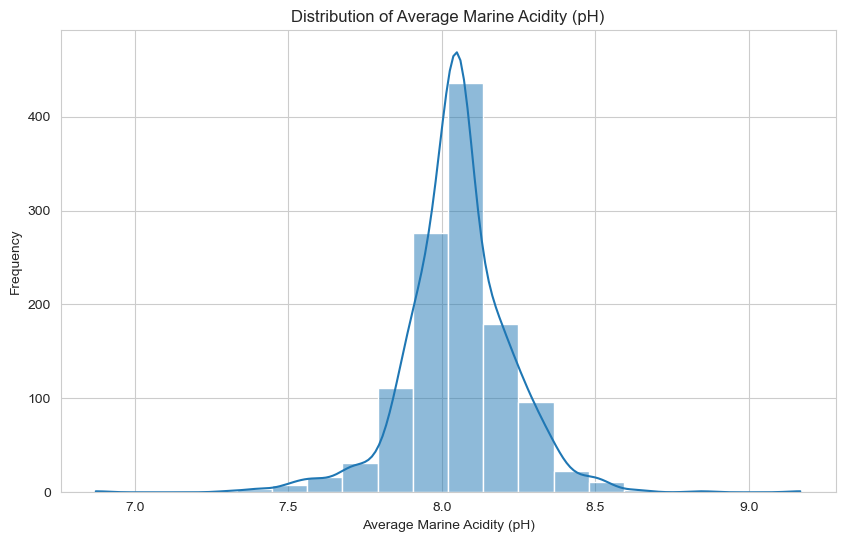

In [197]:
# Plot histogram of acidity levels
plt.figure(figsize=(10, 6))
sns.histplot(data=df3, x='avg_marine_acidity_ph', bins=20, kde=True)
plt.title('Distribution of Average Marine Acidity (pH)')
plt.xlabel('Average Marine Acidity (pH)')
plt.ylabel('Frequency')
plt.show()

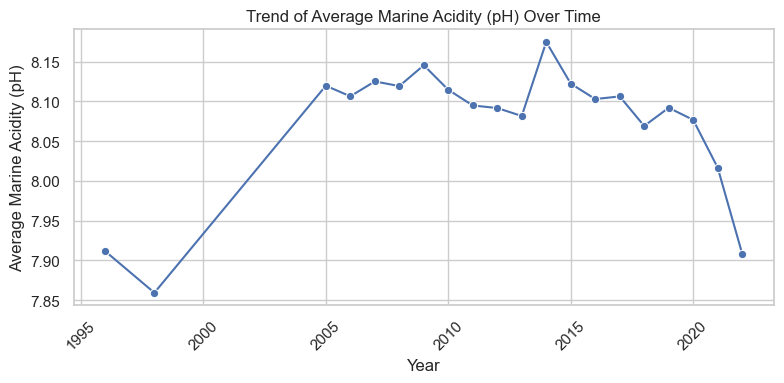

In [201]:
# Set Seaborn style
sns.set(style="whitegrid")

# Group the data by year and calculate the mean acidity level for each year
avg_acidity_by_year = df3.groupby('year')['avg_marine_acidity_ph'].mean().reset_index()

# Plotting the trend of average acidity levels over time
plt.figure(figsize=(8, 4))
sns.lineplot(data=avg_acidity_by_year, x='year', y='avg_marine_acidity_ph', marker='o', color='b')
plt.title('Trend of Average Marine Acidity (pH) Over Time')
plt.xlabel('Year')
plt.ylabel('Average Marine Acidity (pH)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()

## Fourth dataset : cleaning & EDA

In [233]:
# Exploring fourth dataset
explore_dataset(df4)

Shape of the dataset: (42379, 21)


First few rows of the dataset:


,goal,target,indicator,series,seriesDescription,seriesCount,geoAreaCode,geoAreaName,timePeriodStart,value,...,time_detail,timeCoverage,upperBound,lowerBound,basePeriod,source,geoInfoUrl,footnotes,attributes,dimensions
0,['14'],['14.1'],['14.1.1'],EN_MAR_COEUPO,Indicator for Coastal Eutrophication Potential...,1580,99080,Large Marine Ecosystem: Agulhas Current,2000.0,1.94816,...,NaN,NaN,NaN,NaN,NaN,World Environment Situation Room,NaN,[''],"{'Nature': 'N', 'Observation Status': 'A', 'Un...","{'Reporting Type': 'G', 'Nutrient Loading': 'N..."
1,['14'],['14.1'],['14.1.1'],EN_MAR_COEUPO,Indicator for Coastal Eutrophication Potential...,1580,99080,Large Marine Ecosystem: Agulhas Current,2000.0,-0.18833,...,NaN,NaN,NaN,NaN,NaN,World Environment Situation Room,NaN,[''],"{'Nature': 'N', 'Observation Status': 'A', 'Un...","{'Reporting Type': 'G', 'Nutrient Loading': 'P..."
2,['14'],['14.1'],['14.1.1'],EN_MAR_COEUPO,Indicator for Coastal Eutrophication Potential...,1580,99080,Large Marine Ecosystem: Agulhas Current,2001.0,-0.91922,...,NaN,NaN,NaN,NaN,NaN,World Environment Situation Room,NaN,[''],"{'Nature': 'N', 'Observation Status': 'A', 'Un...","{'Reporting Type': 'G', 'Nutrient Loading': 'P..."
3,['14'],['14.1'],['14.1.1'],EN_MAR_COEUPO,Indicator for Coastal Eutrophication Potential...,1580,99080,Large Marine Ecosystem: Agulhas Current,2001.0,1.30948,...,NaN,NaN,NaN,NaN,NaN,World Environment Situation Room,NaN,[''],"{'Nature': 'N', 'Observation Status': 'A', 'Un...","{'Reporting Type': 'G', 'Nutrient Loading': 'N..."
4,['14'],['14.1'],['14.1.1'],EN_MAR_COEUPO,Indicator for Coastal Eutrophication Potential...,1580,99080,Large Marine Ecosystem: Agulhas Current,2002.0,1.59419,...,NaN,NaN,NaN,NaN,NaN,World Environment Situation Room,NaN,[''],"{'Nature': 'N', 'Observation Status': 'A', 'Un...","{'Reporting Type': 'G', 'Nutrient Loading': 'N..."




Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42379 entries, 0 to 42378
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   goal               42379 non-null  object 
 1   target             42379 non-null  object 
 2   indicator          42379 non-null  object 
 3   series             42379 non-null  object 
 4   seriesDescription  42379 non-null  object 
 5   seriesCount        42379 non-null  int64  
 6   geoAreaCode        42379 non-null  int64  
 7   geoAreaName        42379 non-null  object 
 8   timePeriodStart    42379 non-null  float64
 9   value              42379 non-null  float64
 10  valueType          42379 non-null  object 
 11  time_detail        0 non-null      float64
 12  timeCoverage       0 non-null      float64
 13  upperBound         0 non-null      float64
 14  lowerBound         0 non-null      float64
 15  basePeriod         0 non-null      fl

None



Duplicated values per column:


False



Number of duplicated values per column: 0


Missing values per column:


goal                     0
target                   0
indicator                0
series                   0
seriesDescription        0
seriesCount              0
geoAreaCode              0
geoAreaName              0
timePeriodStart          0
value                    0
valueType                0
time_detail          42379
timeCoverage         42379
upperBound           42379
lowerBound           42379
basePeriod           42379
source                   0
geoInfoUrl           42379
footnotes                0
attributes               0
dimensions               0
dtype: int64



Number of unique values per column: 


goal                     1
target                   1
indicator                1
series                  17
seriesdescription       17
seriescount             13
geoareacode            322
geoareaname            322
timeperiodstart         24
value                23423
valuetype                1
time_detail              0
timecoverage             0
upperbound               0
lowerbound               0
baseperiod               0
source                  20
geoinfourl               0
footnotes               29
attributes              15
dimensions             296
dtype: int64

In [234]:
missing_df4 = missing_percentage(df4)
missing_df4.sort_values(by='Percentage', ascending=False).head(20)

,Column_Name,Count,Percentage
11,time_detail,42379,100.0
17,geoinfourl,42379,100.0
15,baseperiod,42379,100.0
14,lowerbound,42379,100.0
13,upperbound,42379,100.0
12,timecoverage,42379,100.0
0,goal,0,0.0
19,attributes,0,0.0
18,footnotes,0,0.0
16,source,0,0.0


In [235]:
# Drop columns with 100% missing values
columns_to_drop_df4 = missing_df4[missing_df4['Percentage'] == 100]['Column_Name'].tolist()

# Drop columns with 100% missing values from your DataFrame
df4.drop(columns=columns_to_drop_df4, inplace=True)

In [236]:
# Clean columns 'goal', 'target', and 'indicator'
df4['goal'] = df4['goal'].str.strip("[]'").astype(int)
df4['target'] = df4['target'].str.strip("[]'").astype(float)
df4['indicator'] = df4['indicator'].str.strip("[]'")

In [237]:
df4

,goal,target,indicator,series,seriesdescription,seriescount,geoareacode,geoareaname,timeperiodstart,value,valuetype,source,footnotes,attributes,dimensions
0,14,14.1,14.1.1,EN_MAR_COEUPO,Indicator for Coastal Eutrophication Potential...,1580,99080,Large Marine Ecosystem: Agulhas Current,2000.0,1.94816,Float,World Environment Situation Room,[''],"{'Nature': 'N', 'Observation Status': 'A', 'Un...","{'Reporting Type': 'G', 'Nutrient Loading': 'N..."
1,14,14.1,14.1.1,EN_MAR_COEUPO,Indicator for Coastal Eutrophication Potential...,1580,99080,Large Marine Ecosystem: Agulhas Current,2000.0,-0.18833,Float,World Environment Situation Room,[''],"{'Nature': 'N', 'Observation Status': 'A', 'Un...","{'Reporting Type': 'G', 'Nutrient Loading': 'P..."
2,14,14.1,14.1.1,EN_MAR_COEUPO,Indicator for Coastal Eutrophication Potential...,1580,99080,Large Marine Ecosystem: Agulhas Current,2001.0,-0.91922,Float,World Environment Situation Room,[''],"{'Nature': 'N', 'Observation Status': 'A', 'Un...","{'Reporting Type': 'G', 'Nutrient Loading': 'P..."
3,14,14.1,14.1.1,EN_MAR_COEUPO,Indicator for Coastal Eutrophication Potential...,1580,99080,Large Marine Ecosystem: Agulhas Current,2001.0,1.30948,Float,World Environment Situation Room,[''],"{'Nature': 'N', 'Observation Status': 'A', 'Un...","{'Reporting Type': 'G', 'Nutrient Loading': 'N..."
4,14,14.1,14.1.1,EN_MAR_COEUPO,Indicator for Coastal Eutrophication Potential...,1580,99080,Large Marine Ecosystem: Agulhas Current,2002.0,1.59419,Float,World Environment Situation Room,[''],"{'Nature': 'N', 'Observation Status': 'A', 'Un...","{'Reporting Type': 'G', 'Nutrient Loading': 'N..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42374,14,14.1,14.1.1,EN_MAR_CHLCONC,Chlorophyll-a concentration (milligram per liter),92,410,Republic of Korea,2021.0,0.00248,Float,Statistics Korea & Ministry of Oceans and Fish...,[''],"{'Nature': 'C', 'Observation Status': 'A', 'Un...","{'Reporting Type': 'G', 'Sampling Stations': '..."
42375,14,14.1,14.1.1,EN_MAR_CHLCONC,Chlorophyll-a concentration (milligram per liter),92,410,Republic of Korea,2022.0,0.00256,Float,Statistics Korea & Ministry of Oceans and Fish...,[''],"{'Nature': 'C', 'Observation Status': 'A', 'Un...","{'Reporting Type': 'G', 'Sampling Stations': '..."
42376,14,14.1,14.1.1,EN_MAR_CHLCONC,Chlorophyll-a concentration (milligram per liter),92,792,Türkiye,2018.0,0.00036,Float,Ministry of Environment Urbanization adn Clima...,[''],"{'Nature': 'C', 'Observation Status': 'A', 'Un...","{'Reporting Type': 'G', 'Sampling Stations': '..."
42377,14,14.1,14.1.1,EN_MAR_CHLCONC,Chlorophyll-a concentration (milligram per liter),92,792,Türkiye,2019.0,0.00023,Float,Ministry of Environment Urbanization adn Clima...,[''],"{'Nature': 'C', 'Observation Status': 'A', 'Un...","{'Reporting Type': 'G', 'Sampling Stations': '..."


In [238]:
# Let's filter the DataFrame to keep only 'beach litter' information

# Filter rows where 'seriesdescription' contains 'beach litter'
df4_filtered = df4[df4['seriesdescription'].str.contains('beach litter', case=False)]

df4_filtered

,goal,target,indicator,series,seriesdescription,seriescount,geoareacode,geoareaname,timeperiodstart,value,valuetype,source,footnotes,attributes,dimensions
9177,14,14.1,14.1.1,EN_MAR_BEALITSQ,Beach litter per square kilometer (Number),857,2,Africa,2015.0,3.823506e+06,Float,"Plastic Pollution (MLW, MDMAP, ICC)",[''],"{'Nature': 'N', 'Units': 'NUMBER', 'Observatio...",{'Reporting Type': 'G'}
9178,14,14.1,14.1.1,EN_MAR_BEALITSQ,Beach litter per square kilometer (Number),857,2,Africa,2016.0,5.685998e+06,Float,"Plastic Pollution (MLW, MDMAP, ICC)",[''],"{'Nature': 'N', 'Units': 'NUMBER', 'Observatio...",{'Reporting Type': 'G'}
9179,14,14.1,14.1.1,EN_MAR_BEALITSQ,Beach litter per square kilometer (Number),857,2,Africa,2017.0,2.529507e+06,Float,"Plastic Pollution (MLW, MDMAP, ICC)",[''],"{'Nature': 'N', 'Units': 'NUMBER', 'Observatio...",{'Reporting Type': 'G'}
9180,14,14.1,14.1.1,EN_MAR_BEALITSQ,Beach litter per square kilometer (Number),857,2,Africa,2018.0,2.992494e+07,Float,"Plastic Pollution (MLW, MDMAP, ICC)",[''],"{'Nature': 'N', 'Units': 'NUMBER', 'Observatio...",{'Reporting Type': 'G'}
9181,14,14.1,14.1.1,EN_MAR_BEALITSQ,Beach litter per square kilometer (Number),857,2,Africa,2019.0,4.628005e+06,Float,"Plastic Pollution (MLW, MDMAP, ICC)",[''],"{'Nature': 'N', 'Units': 'NUMBER', 'Observatio...",{'Reporting Type': 'G'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35073,14,14.1,14.1.1,EN_MAR_BEALIT_EXP,Exported beach litter originating from nationa...,1085,887,Yemen,2018.0,3.843900e+04,Float,Center for Ocean-Atmospheric Prediction Studie...,[''],"{'Nature': 'M', 'Units': 'TONNES', 'Observatio...",{'Reporting Type': 'G'}
35074,14,14.1,14.1.1,EN_MAR_BEALIT_EXP,Exported beach litter originating from nationa...,1085,887,Yemen,2019.0,3.982300e+04,Float,Center for Ocean-Atmospheric Prediction Studie...,[''],"{'Nature': 'M', 'Units': 'TONNES', 'Observatio...",{'Reporting Type': 'G'}
35075,14,14.1,14.1.1,EN_MAR_BEALIT_EXP,Exported beach litter originating from nationa...,1085,887,Yemen,2020.0,4.093700e+04,Float,Center for Ocean-Atmospheric Prediction Studie...,[''],"{'Nature': 'M', 'Units': 'TONNES', 'Observatio...",{'Reporting Type': 'G'}
35076,14,14.1,14.1.1,EN_MAR_BEALIT_EXP,Exported beach litter originating from nationa...,1085,887,Yemen,2021.0,4.186800e+04,Float,Center for Ocean-Atmospheric Prediction Studie...,[''],"{'Nature': 'M', 'Units': 'TONNES', 'Observatio...",{'Reporting Type': 'G'}


In [239]:
# Filter rows to exclude those containing specified seriesdescription values
df4_filtered_v2 = df4_filtered[~df4_filtered['seriesdescription'].str.contains('Beach litter per square kilometer', case=False) & 
                 ~df4_filtered['seriesdescription'].str.contains('Exported beach litter originating from national land-based sources', case=False)]

df4_filtered_v2


,goal,target,indicator,series,seriesdescription,seriescount,geoareacode,geoareaname,timeperiodstart,value,valuetype,source,footnotes,attributes,dimensions
10054,14,14.1,14.1.1,EN_MAR_BEALIT_BP,Beach litter originating from national land-ba...,936,2,Africa,2017.0,76.37712,Float,Center for Ocean-Atmospheric Prediction Studie...,[''],"{'Nature': 'N', 'Units': 'PERCENT', 'Observati...",{'Reporting Type': 'G'}
10055,14,14.1,14.1.1,EN_MAR_BEALIT_BP,Beach litter originating from national land-ba...,936,2,Africa,2018.0,74.84003,Float,Center for Ocean-Atmospheric Prediction Studie...,[''],"{'Nature': 'N', 'Units': 'PERCENT', 'Observati...",{'Reporting Type': 'G'}
10056,14,14.1,14.1.1,EN_MAR_BEALIT_BP,Beach litter originating from national land-ba...,936,2,Africa,2019.0,75.86769,Float,Center for Ocean-Atmospheric Prediction Studie...,[''],"{'Nature': 'N', 'Units': 'PERCENT', 'Observati...",{'Reporting Type': 'G'}
10057,14,14.1,14.1.1,EN_MAR_BEALIT_BP,Beach litter originating from national land-ba...,936,2,Africa,2020.0,76.28417,Float,Center for Ocean-Atmospheric Prediction Studie...,[''],"{'Nature': 'N', 'Units': 'PERCENT', 'Observati...",{'Reporting Type': 'G'}
10058,14,14.1,14.1.1,EN_MAR_BEALIT_BP,Beach litter originating from national land-ba...,936,2,Africa,2021.0,77.02952,Float,Center for Ocean-Atmospheric Prediction Studie...,[''],"{'Nature': 'N', 'Units': 'PERCENT', 'Observati...",{'Reporting Type': 'G'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33988,14,14.1,14.1.1,EN_MAR_BEALIT_OV,Beach litter originating from national land-ba...,936,887,Yemen,2017.0,6555.00000,Float,Center for Ocean-Atmospheric Prediction Studie...,[''],"{'Nature': 'M', 'Units': 'TONNES', 'Observatio...",{'Reporting Type': 'G'}
33989,14,14.1,14.1.1,EN_MAR_BEALIT_OV,Beach litter originating from national land-ba...,936,887,Yemen,2018.0,4234.00000,Float,Center for Ocean-Atmospheric Prediction Studie...,[''],"{'Nature': 'M', 'Units': 'TONNES', 'Observatio...",{'Reporting Type': 'G'}
33990,14,14.1,14.1.1,EN_MAR_BEALIT_OV,Beach litter originating from national land-ba...,936,887,Yemen,2019.0,4198.00000,Float,Center for Ocean-Atmospheric Prediction Studie...,[''],"{'Nature': 'M', 'Units': 'TONNES', 'Observatio...",{'Reporting Type': 'G'}
33991,14,14.1,14.1.1,EN_MAR_BEALIT_OV,Beach litter originating from national land-ba...,936,887,Yemen,2020.0,4905.00000,Float,Center for Ocean-Atmospheric Prediction Studie...,[''],"{'Nature': 'M', 'Units': 'TONNES', 'Observatio...",{'Reporting Type': 'G'}


In [240]:
df4_filtered_v2['footnotes'].value_counts()

footnotes
['']    23939
Name: count, dtype: int64

In [241]:
# Let's also drop some other columns that are not relevant for our further analysis
df4_filtered_v2.drop(columns=['series','seriescount','valuetype','footnotes','dimensions', 'attributes'], inplace=True)

/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/2006784484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_filtered_v2.drop(columns=['series','seriescount','valuetype','footnotes','dimensions', 'attributes'], inplace=True)


In [242]:
df4_filtered_v2

,goal,target,indicator,seriesdescription,geoareacode,geoareaname,timeperiodstart,value,source
10054,14,14.1,14.1.1,Beach litter originating from national land-ba...,2,Africa,2017.0,76.37712,Center for Ocean-Atmospheric Prediction Studie...
10055,14,14.1,14.1.1,Beach litter originating from national land-ba...,2,Africa,2018.0,74.84003,Center for Ocean-Atmospheric Prediction Studie...
10056,14,14.1,14.1.1,Beach litter originating from national land-ba...,2,Africa,2019.0,75.86769,Center for Ocean-Atmospheric Prediction Studie...
10057,14,14.1,14.1.1,Beach litter originating from national land-ba...,2,Africa,2020.0,76.28417,Center for Ocean-Atmospheric Prediction Studie...
10058,14,14.1,14.1.1,Beach litter originating from national land-ba...,2,Africa,2021.0,77.02952,Center for Ocean-Atmospheric Prediction Studie...
...,...,...,...,...,...,...,...,...,...
33988,14,14.1,14.1.1,Beach litter originating from national land-ba...,887,Yemen,2017.0,6555.00000,Center for Ocean-Atmospheric Prediction Studie...
33989,14,14.1,14.1.1,Beach litter originating from national land-ba...,887,Yemen,2018.0,4234.00000,Center for Ocean-Atmospheric Prediction Studie...
33990,14,14.1,14.1.1,Beach litter originating from national land-ba...,887,Yemen,2019.0,4198.00000,Center for Ocean-Atmospheric Prediction Studie...
33991,14,14.1,14.1.1,Beach litter originating from national land-ba...,887,Yemen,2020.0,4905.00000,Center for Ocean-Atmospheric Prediction Studie...


In [243]:
df4_filtered_v2 = df4_filtered_v2.rename(columns={'geoareaname': 'country', 'geoareacode': 'country_code', 'timeperiodstart': 'year'})

In [244]:
df4_filtered_v2['seriesdescription'].value_counts()

seriesdescription
Beach litter originating from national land-based sources that ends in the beach (Tonnes)    21131
Beach litter originating from national land-based sources that ends in the beach (%)           936
Beach litter originating from national land-based sources that ends in the ocean (%)           936
Beach litter originating from national land-based sources that ends in the ocean (Tonnes)      936
Name: count, dtype: int64

In [245]:
# Create new columns with NaN values
df4_filtered_v2['beach_litter_in_beach_value'] = np.nan
df4_filtered_v2['beach_litter_in_beach_percent'] = np.nan
df4_filtered_v2['beach_litter_in_ocean_percent'] = np.nan
df4_filtered_v2['beach_litter_in_ocean_value'] = np.nan

# Update values based on conditions
df4_filtered_v2.loc[df4_filtered_v2['seriesdescription'].str.contains('Beach litter originating from national land-based sources that ends in the beach \(Tonnes\)'), 'beach_litter_in_beach_value'] = df4_filtered_v2['value']
df4_filtered_v2.loc[df4_filtered_v2['seriesdescription'].str.contains('Beach litter originating from national land-based sources that ends in the beach \(\%\)'), 'beach_litter_in_beach_percent'] = df4_filtered_v2['value']
df4_filtered_v2.loc[df4_filtered_v2['seriesdescription'].str.contains('Beach litter originating from national land-based sources that ends in the ocean \(\%\)'), 'beach_litter_in_ocean_percent'] = df4_filtered_v2['value']
df4_filtered_v2.loc[df4_filtered_v2['seriesdescription'].str.contains('Beach litter originating from national land-based sources that ends in the ocean \(Tonnes\)'), 'beach_litter_in_ocean_value'] = df4_filtered_v2['value']


In [246]:
df4_filtered_v2

,goal,target,indicator,seriesdescription,country_code,country,year,value,source,beach_litter_in_beach_value,beach_litter_in_beach_percent,beach_litter_in_ocean_percent,beach_litter_in_ocean_value
10054,14,14.1,14.1.1,Beach litter originating from national land-ba...,2,Africa,2017.0,76.37712,Center for Ocean-Atmospheric Prediction Studie...,NaN,76.37712,NaN,NaN
10055,14,14.1,14.1.1,Beach litter originating from national land-ba...,2,Africa,2018.0,74.84003,Center for Ocean-Atmospheric Prediction Studie...,NaN,74.84003,NaN,NaN
10056,14,14.1,14.1.1,Beach litter originating from national land-ba...,2,Africa,2019.0,75.86769,Center for Ocean-Atmospheric Prediction Studie...,NaN,75.86769,NaN,NaN
10057,14,14.1,14.1.1,Beach litter originating from national land-ba...,2,Africa,2020.0,76.28417,Center for Ocean-Atmospheric Prediction Studie...,NaN,76.28417,NaN,NaN
10058,14,14.1,14.1.1,Beach litter originating from national land-ba...,2,Africa,2021.0,77.02952,Center for Ocean-Atmospheric Prediction Studie...,NaN,77.02952,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33988,14,14.1,14.1.1,Beach litter originating from national land-ba...,887,Yemen,2017.0,6555.00000,Center for Ocean-Atmospheric Prediction Studie...,NaN,NaN,NaN,6555.0
33989,14,14.1,14.1.1,Beach litter originating from national land-ba...,887,Yemen,2018.0,4234.00000,Center for Ocean-Atmospheric Prediction Studie...,NaN,NaN,NaN,4234.0
33990,14,14.1,14.1.1,Beach litter originating from national land-ba...,887,Yemen,2019.0,4198.00000,Center for Ocean-Atmospheric Prediction Studie...,NaN,NaN,NaN,4198.0
33991,14,14.1,14.1.1,Beach litter originating from national land-ba...,887,Yemen,2020.0,4905.00000,Center for Ocean-Atmospheric Prediction Studie...,NaN,NaN,NaN,4905.0


In [247]:
df4_filtered_v2.isnull().sum()

goal                                 0
target                               0
indicator                            0
seriesdescription                    0
country_code                         0
country                              0
year                                 0
value                                0
source                               0
beach_litter_in_beach_value       2808
beach_litter_in_beach_percent    23003
beach_litter_in_ocean_percent    23003
beach_litter_in_ocean_value      23003
dtype: int64

In [248]:
rename_values_to_lower(df4_filtered_v2)

,goal,target,indicator,seriesdescription,country_code,country,year,value,source,beach_litter_in_beach_value,beach_litter_in_beach_percent,beach_litter_in_ocean_percent,beach_litter_in_ocean_value
10054,14,14.1,14.1.1,beach litter originating from national land-ba...,2,africa,2017.0,76.37712,center for ocean-atmospheric prediction studie...,NaN,76.37712,NaN,NaN
10055,14,14.1,14.1.1,beach litter originating from national land-ba...,2,africa,2018.0,74.84003,center for ocean-atmospheric prediction studie...,NaN,74.84003,NaN,NaN
10056,14,14.1,14.1.1,beach litter originating from national land-ba...,2,africa,2019.0,75.86769,center for ocean-atmospheric prediction studie...,NaN,75.86769,NaN,NaN
10057,14,14.1,14.1.1,beach litter originating from national land-ba...,2,africa,2020.0,76.28417,center for ocean-atmospheric prediction studie...,NaN,76.28417,NaN,NaN
10058,14,14.1,14.1.1,beach litter originating from national land-ba...,2,africa,2021.0,77.02952,center for ocean-atmospheric prediction studie...,NaN,77.02952,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33988,14,14.1,14.1.1,beach litter originating from national land-ba...,887,yemen,2017.0,6555.00000,center for ocean-atmospheric prediction studie...,NaN,NaN,NaN,6555.0
33989,14,14.1,14.1.1,beach litter originating from national land-ba...,887,yemen,2018.0,4234.00000,center for ocean-atmospheric prediction studie...,NaN,NaN,NaN,4234.0
33990,14,14.1,14.1.1,beach litter originating from national land-ba...,887,yemen,2019.0,4198.00000,center for ocean-atmospheric prediction studie...,NaN,NaN,NaN,4198.0
33991,14,14.1,14.1.1,beach litter originating from national land-ba...,887,yemen,2020.0,4905.00000,center for ocean-atmospheric prediction studie...,NaN,NaN,NaN,4905.0


In [250]:
# Convert 'year' values to integers representing years
df4_filtered_v2['year'] = df4_filtered_v2['year'].astype(str).str[:4].astype(int)

In [252]:
df4_filtered_v2.dtypes

goal                               int64
target                           float64
indicator                         object
seriesdescription                 object
country_code                       int64
country                           object
year                               int64
value                            float64
source                            object
beach_litter_in_beach_value      float64
beach_litter_in_beach_percent    float64
beach_litter_in_ocean_percent    float64
beach_litter_in_ocean_value      float64
dtype: object

In [256]:
# Let's break down the Dataframe into 4 distinct Dataframes for further analysis

# Before, let's drop 'seriesdescription' and 'value' columns as we have broke them down into new columns of the DataFrame
df4_filtered_v2.drop(columns=['seriesdescription', 'value'], inplace=True)


# Create separate DataFrames for each new column
df_beach_litter_value = df4_filtered_v2[['goal', 'target', 'indicator', 'country_code', 'country', 'year', 'source', 'beach_litter_in_beach_value']]

df_beach_litter_percent = df4_filtered_v2[['goal', 'target', 'indicator', 'country_code', 'country', 'year', 'source', 'beach_litter_in_beach_percent']]

df_ocean_litter_percent = df4_filtered_v2[['goal', 'target', 'indicator', 'country_code', 'country', 'year', 'source', 'beach_litter_in_ocean_percent']]

df_ocean_litter_value = df4_filtered_v2[['goal', 'target', 'indicator', 'country_code', 'country', 'year', 'source', 'beach_litter_in_ocean_value']]


In [260]:
# For each DataFrame, let's handle null values 

df_beach_litter_value.dropna(subset=['beach_litter_in_beach_value'], inplace=True)
df_beach_litter_percent.dropna(subset=['beach_litter_in_beach_percent'], inplace=True)
df_ocean_litter_percent.dropna(subset=['beach_litter_in_ocean_percent'], inplace=True)
df_ocean_litter_value.dropna(subset=['beach_litter_in_ocean_value'], inplace=True)

/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/271940968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beach_litter_value.dropna(subset=['beach_litter_in_beach_value'], inplace=True)
/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/271940968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beach_litter_percent.dropna(subset=['beach_litter_in_beach_percent'], inplace=True)
/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/271940968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [271]:
# Round values of columns to 2 decimals
df_ocean_litter_value['beach_litter_in_ocean_value'] = df_ocean_litter_value['beach_litter_in_ocean_value'].round(2)
df_ocean_litter_percent['beach_litter_in_ocean_percent'] = df_ocean_litter_percent['beach_litter_in_ocean_percent'].round(2)
df_beach_litter_percent['beach_litter_in_beach_percent'] = df_beach_litter_percent['beach_litter_in_beach_percent'].round(2)
df_beach_litter_value['beach_litter_in_beach_value'] = df_beach_litter_value['beach_litter_in_beach_value'].round(2)

/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/1786548591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ocean_litter_percent['beach_litter_in_ocean_percent'] = df_ocean_litter_percent['beach_litter_in_ocean_percent'].round(2)
/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/1786548591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beach_litter_percent['beach_litter_in_beach_percent'] = df_beach_litter_percent['beach_litter_in_beach_percent'].round(2)
/var/fol

In [276]:
# Let's store our 4 new DataFrames into csv files
df_ocean_litter_value.to_csv('df_ocean_litter_value.csv', index=False)
df_ocean_litter_percent.to_csv('df_ocean_litter_percent.csv', index=False)
df_beach_litter_value.to_csv('df_beach_litter_value.csv', index=False)
df_beach_litter_percent.to_csv('df_beach_litter_percent.csv', index=False)

In [284]:
total_beach_litter_per_year = df_ocean_litter_value.groupby('year')['beach_litter_in_ocean_value'].sum()
print("Total Beach Litter in Ocean (tons) per Year:")
print(total_beach_litter_per_year)


Total Beach Litter in Ocean (tons) per Year:
year
2017    23474500.0
2018    23253357.0
2019    23015227.0
2020    24159339.0
2021    26114804.0
2022    21839856.0
Name: beach_litter_in_ocean_value, dtype: float64


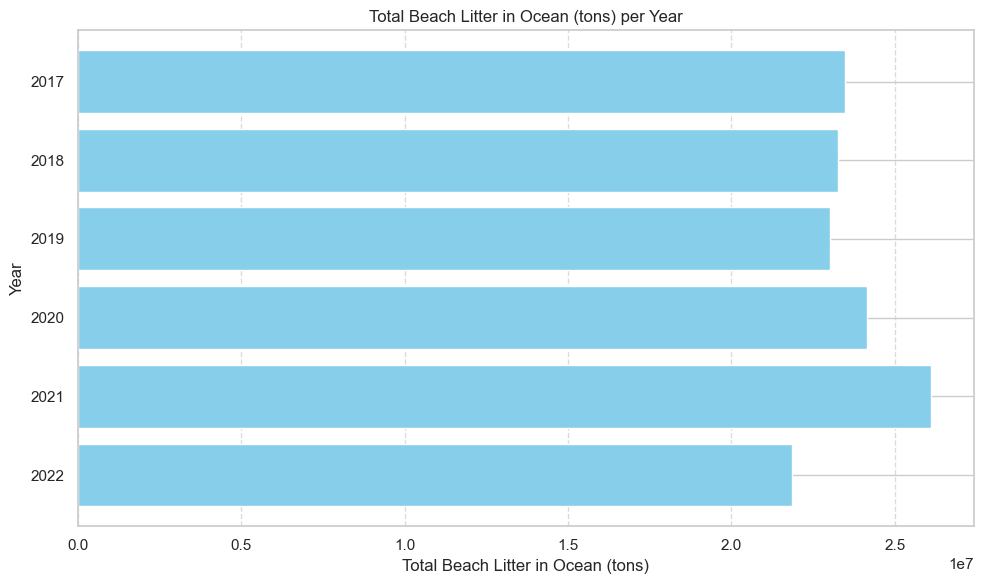

In [287]:
# Plotting
plt.figure(figsize=(10, 6))
total_beach_litter_per_year.sort_index(ascending=False).plot(kind='barh', color='skyblue', width=0.8)   # Sort by year in descending order
plt.ylabel('Year')
plt.xlabel('Total Beach Litter in Ocean (tons)')
plt.title('Total Beach Litter in Ocean (tons) per Year')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines on x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

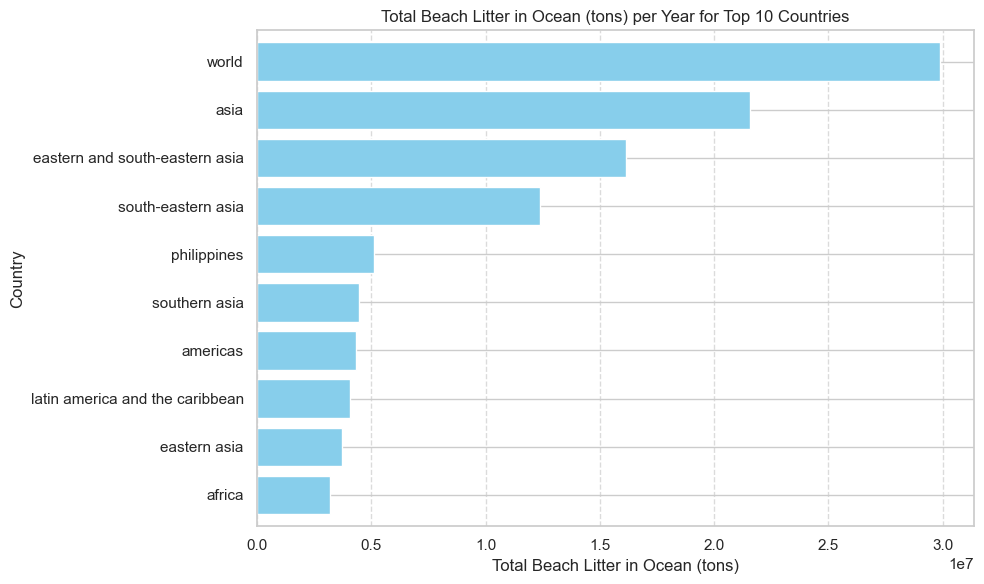

In [302]:
# Grouping by country and summing the beach litter values
total_beach_litter_per_country = df_ocean_litter_value.groupby('country')['beach_litter_in_ocean_value'].sum()

# Selecting the top 10 countries
top_10_countries = total_beach_litter_per_country.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_countries.sort_values().plot(kind='barh', color='skyblue', width=0.8)  # Sort by litter values
plt.xlabel('Total Beach Litter in Ocean (tons)')
plt.ylabel('Country')
plt.title('Total Beach Litter in Ocean (tons) per Year for Top 10 Countries')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines on x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


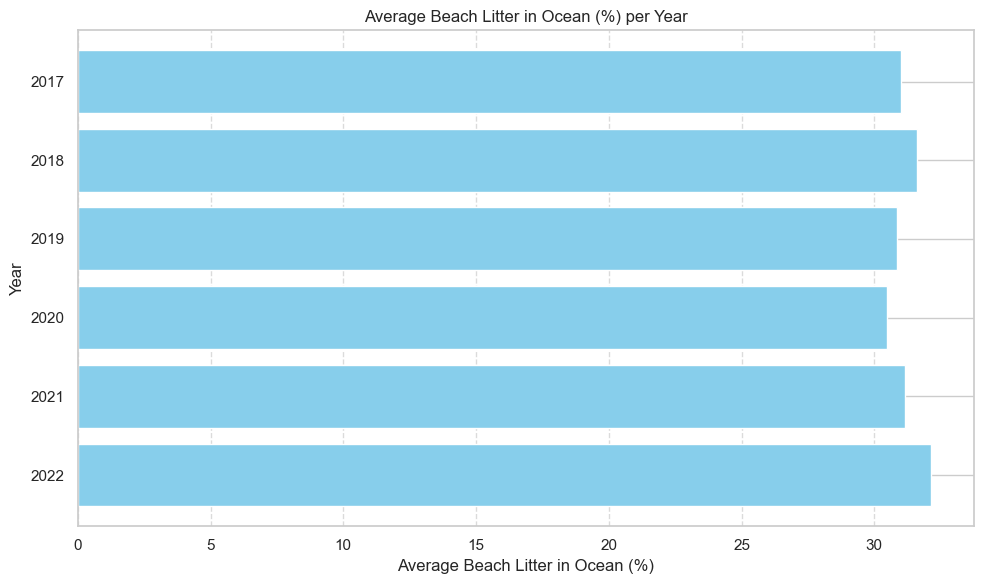

In [305]:
# Grouping by year and calculating the average of beach litter percentage
average_beach_litter_percent_per_year = df_ocean_litter_percent.groupby('year')['beach_litter_in_ocean_percent'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_beach_litter_percent_per_year.sort_index(ascending=False).plot(kind='barh', color='skyblue', width=0.8)   # Sort by year in descending order
plt.xlabel('Average Beach Litter in Ocean (%)')
plt.ylabel('Year')  # Adjusted to display year on the y-axis
plt.title('Average Beach Litter in Ocean (%) per Year')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines on x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

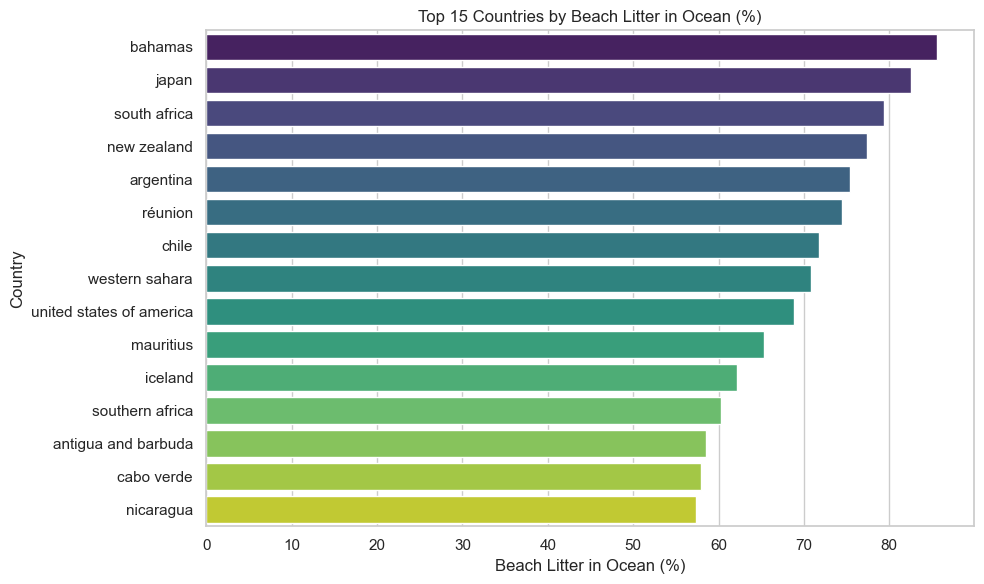

In [300]:
# Grouping by country and calculating total beach litter percentage
total_beach_litter_percent_per_country = df_ocean_litter_percent.groupby('country')['beach_litter_in_ocean_percent'].mean()

# Sorting the total percentages in descending order
sorted_percentages = total_beach_litter_percent_per_country.sort_values(ascending=False)

# Selecting the top 15 countries
top_10_countries = sorted_percentages.head(15)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_countries.reset_index(), x='beach_litter_in_ocean_percent', y='country', palette='viridis')
plt.xlabel('Beach Litter in Ocean (%)')
plt.ylabel('Country')
plt.title('Top 15 Countries by Beach Litter in Ocean (%)')
plt.tight_layout()
plt.show()


In [306]:
# Grouping by year and calculating total beach litter in beach value
total_beach_litter_beach_per_year = df_beach_litter_value.groupby('year')['beach_litter_in_beach_value'].sum()

# Print the result
print("Total Beach Litter in Beach (tons) per Year:")
print(total_beach_litter_beach_per_year)


Total Beach Litter in Beach (tons) per Year:
year
2017    61220754.0
2018    65601633.0
2019    69256289.0
2020    70588907.0
2021    70530924.0
2022    63118769.0
Name: beach_litter_in_beach_value, dtype: float64


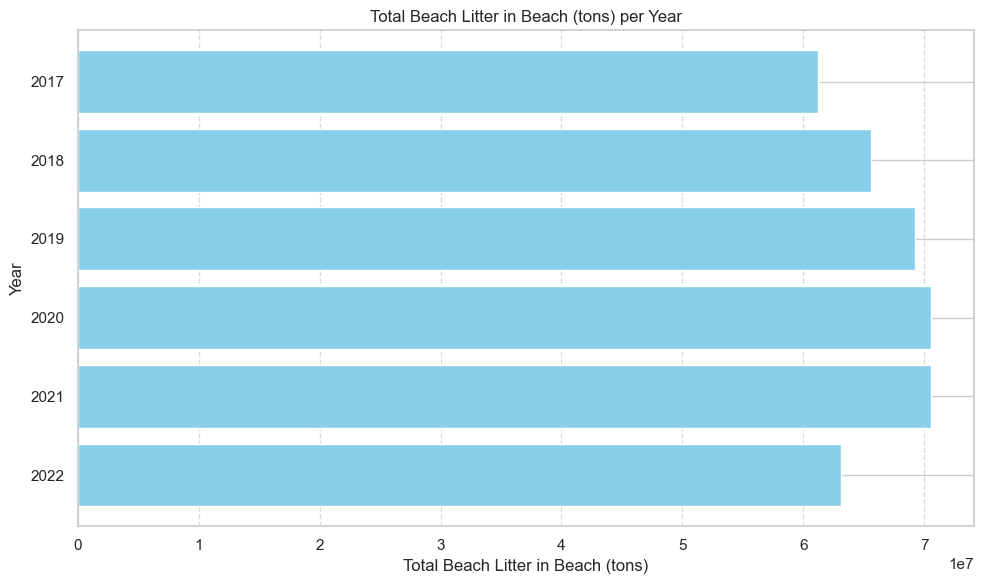

In [307]:
# Plotting
plt.figure(figsize=(10, 6))
total_beach_litter_beach_per_year.sort_index(ascending=False).plot(kind='barh', color='skyblue', width=0.8)   # Sort by year in descending order
plt.ylabel('Year')
plt.xlabel('Total Beach Litter in Beach (tons)')
plt.title('Total Beach Litter in Beach (tons) per Year')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines on x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


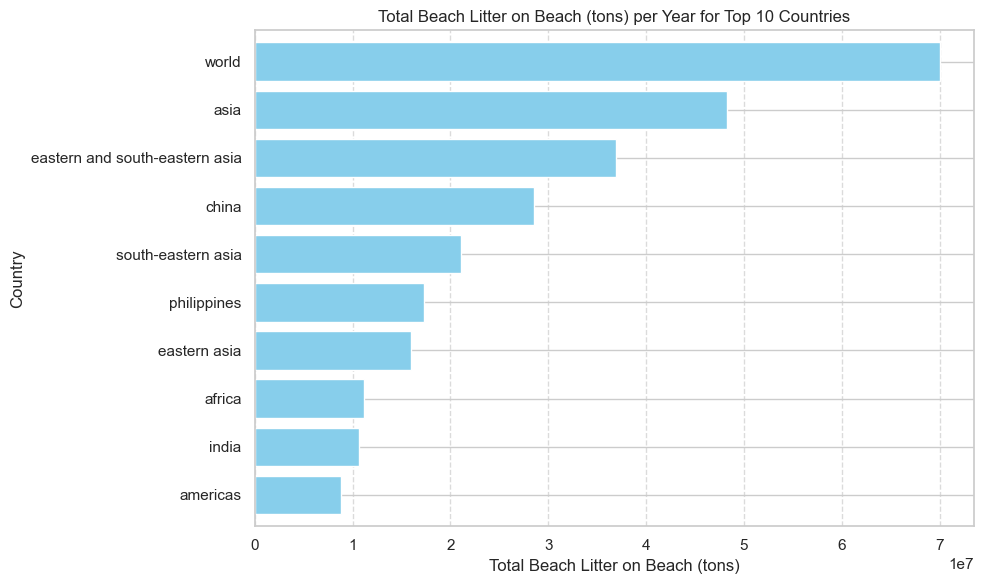

In [308]:
# Grouping by country and summing the beach litter values
total_beach_litter_beach_per_country = df_beach_litter_value.groupby('country')['beach_litter_in_beach_value'].sum()

# Selecting the top 10 countries
top_10_countries_beach = total_beach_litter_beach_per_country.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_countries_beach.sort_values().plot(kind='barh', color='skyblue', width=0.8)  # Sort by litter values
plt.xlabel('Total Beach Litter on Beach (tons)')
plt.ylabel('Country')
plt.title('Total Beach Litter on Beach (tons) per Year for Top 10 Countries')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines on x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


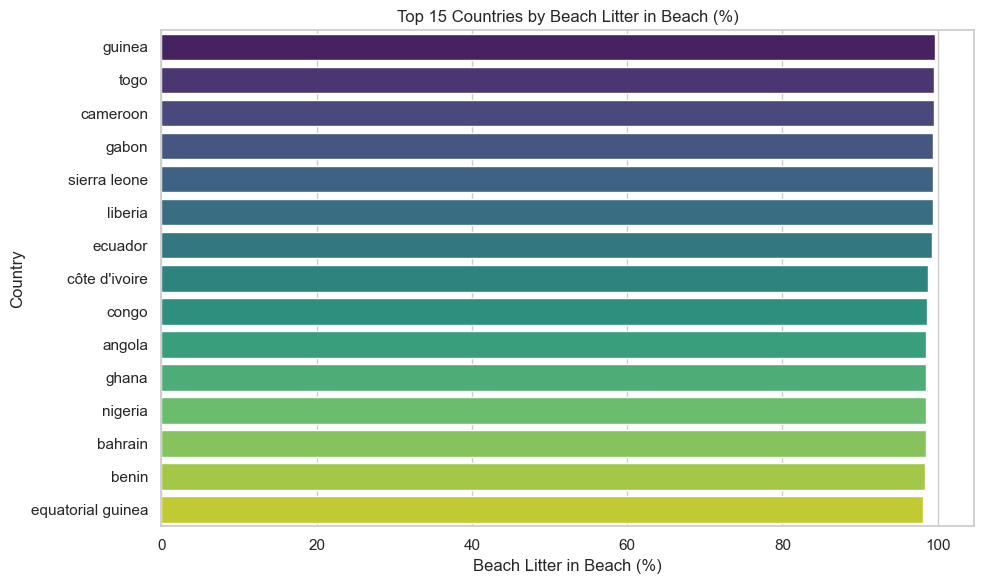

In [316]:
# Grouping by country and calculating total beach litter percentage
total_beach_litter_percent_per_country = df_beach_litter_percent.groupby('country')['beach_litter_in_beach_percent'].mean()

# Sorting the total percentages in descending order
sorted_percentages = total_beach_litter_percent_per_country.sort_values(ascending=False)

# Selecting the top 15 countries
top_15_countries = sorted_percentages.head(15)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_15_countries.reset_index(), x='beach_litter_in_beach_percent', y='country', palette='viridis')
plt.xlabel('Beach Litter in Beach (%)')
plt.ylabel('Country')
plt.title('Top 15 Countries by Beach Litter in Beach (%)')
plt.tight_layout()
plt.show()


## Fifth dataset : cleaning & EDA

In [360]:
# Exploring first dataset
explore_dataset(df5)

Shape of the dataset: (69, 4)


First few rows of the dataset:


,Entity,Code,Year,Annual plastic production between 1950 and 2019
0,World,OWID_WRL,1950,2000000
1,World,OWID_WRL,1951,2000000
2,World,OWID_WRL,1952,2000000
3,World,OWID_WRL,1953,3000000
4,World,OWID_WRL,1954,3000000




Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Entity                                           69 non-null     object
 1   Code                                             69 non-null     object
 2   Year                                             69 non-null     int64 
 3   Annual plastic production between 1950 and 2019  69 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ KB


None



Duplicated values per column:


False



Number of duplicated values per column: 0


Missing values per column:


Entity                                             0
Code                                               0
Year                                               0
Annual plastic production between 1950 and 2019    0
dtype: int64



Number of unique values per column: 


entity                                              1
code                                                1
year                                               69
annual plastic production between 1950 and 2019    65
dtype: int64

In [361]:
# Let's drop the columns that are not relevant for our further analysis
df5.drop(columns=['code'], inplace=True)

In [362]:
# Renaming columns names
replace_column_name(df5, 'annual plastic production between 1950 and 2019', 'annual_plastic_production_tons')

In [363]:
df5.head()

,entity,year,annual_plastic_production_tons
0,World,1950,2000000
1,World,1951,2000000
2,World,1952,2000000
3,World,1953,3000000
4,World,1954,3000000


In [365]:
# Since our analysis is between 1980 to 2020 for the first coral bleaching dataset, let's filter the year column
years_range = range(1980, 2020)

years_df = pd.DataFrame({'year': years_range})

merged_df5 = pd.merge(df5, years_df, on='year', how='right')

merged_df5.head()


,entity,year,annual_plastic_production_tons
0,World,1980,70000000
1,World,1981,72000000
2,World,1982,73000000
3,World,1983,80000000
4,World,1984,86000000


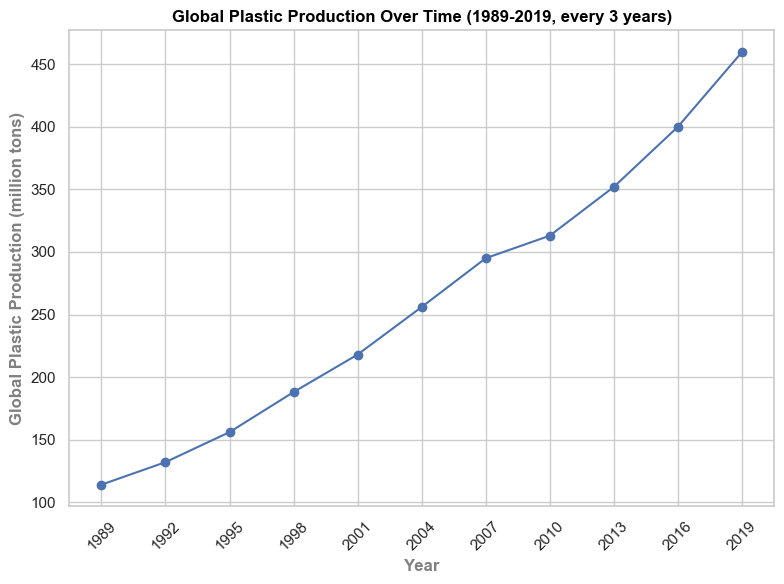

In [418]:
#Convert tons to million tons
merged_df5['annual_plastic_production_million_tons'] = merged_df5['annual_plastic_production_tons'] / 1000000

# Filter the DataFrame to include only the years from 1989 to 2019 with a 3-year gap
filtered_df = merged_df5[(merged_df5['year'] >= 1989) & (merged_df5['year'] <= 2019) & ((merged_df5['year'] - 1980) % 3 == 0)]

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(filtered_df['year'], filtered_df['annual_plastic_production_million_tons'], marker='o', color='b', linestyle='-', label='Plastic Production')

# Add labels and title
plt.xlabel('Year', fontweight='bold', color='grey') 
plt.ylabel('Global Plastic Production (million tons)', fontweight='bold', color='grey')  # Bold and grey y-axis label
plt.title('Global Plastic Production Over Time (1989-2019, every 3 years)', color='black', fontweight='bold')  # Title in red color and bold


# Show the plot
plt.grid(True)
plt.xticks(filtered_df['year'], rotation=45)
plt.tight_layout()
plt.show()


In [415]:
merged_df5.to_csv('global_plastic_production.csv', index=False)

## Sixth dataset : cleaning & EDA

In [420]:
# Exploring sixth dataset
explore_dataset(df6)

Shape of the dataset: (170, 4)


First few rows of the dataset:


,Entity,Code,Year,Share of global plastics emitted to ocean
0,Africa,NaN,2019,7.989317
1,Albania,ALB,2019,0.159782
2,Algeria,DZA,2019,0.589510
3,Angola,AGO,2019,0.087804
4,Antigua and Barbuda,ATG,2019,0.000204




Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Entity                                     170 non-null    object 
 1   Code                                       159 non-null    object 
 2   Year                                       170 non-null    int64  
 3   Share of global plastics emitted to ocean  170 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.4+ KB


None



Duplicated values per column:


False



Number of duplicated values per column: 0


Missing values per column:


Entity                                        0
Code                                         11
Year                                          0
Share of global plastics emitted to ocean     0
dtype: int64



Number of unique values per column: 


entity                                       170
code                                         159
year                                           1
share of global plastics emitted to ocean    131
dtype: int64

In [421]:
# Let's drop the columns that are not relevant for our further analysis
df6.drop(columns=['code'], inplace=True)

In [422]:
# Renaming columns names
replace_column_name(df6, 'entity', 'country')

In [423]:
df6.head()

,country,year,share of global plastics emitted to ocean
0,Africa,2019,7.989317
1,Albania,2019,0.159782
2,Algeria,2019,0.589510
3,Angola,2019,0.087804
4,Antigua and Barbuda,2019,0.000204


In [424]:
# Let's keep only the continents
continents_to_keep = ["Asia", "Africa", "South America", "North America", "Oceania", "Europe"]

filtered_df6 = df6[df6['country'].isin(continents_to_keep)]

filtered_df6

,country,year,share of global plastics emitted to ocean
0,Africa,2019,7.989317
6,Asia,2019,80.993570
46,Europe,2019,0.595431
108,North America,2019,4.499121
111,Oceania,2019,0.370715
144,South America,2019,5.513253


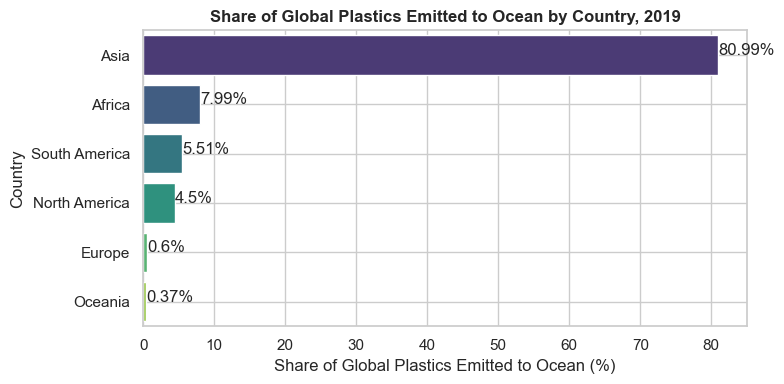

In [441]:
# Order by descending
sorted_df6 = filtered_df6.sort_values(by='share of global plastics emitted to ocean', ascending=False)

# Round up to 2 decimals
sorted_df6['rounded_percentage'] = sorted_df6['share of global plastics emitted to ocean'].round(2)

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x='share of global plastics emitted to ocean', y='country', data=sorted_df6, palette='viridis')

for index, value in enumerate(sorted_df6['rounded_percentage']):
    plt.text(value, index, str(value) + '%')


plt.xlabel('Share of Global Plastics Emitted to Ocean (%)')
plt.ylabel('Country')
plt.title('Share of Global Plastics Emitted to Ocean by Country, 2019', fontweight='bold') 

plt.grid(True)
plt.tight_layout()
plt.show()


In [442]:
filtered_df6.to_csv('share_global_plastics_to_oceans_by_continent.csv', index=False)

## Seventh dataset : cleaning & EDA

In [471]:
# Exploring seventh dataset
explore_dataset(df7)

Shape of the dataset: (200, 4)


First few rows of the dataset:


,Entity,Code,Year,Plastic leakage to aquatic envrionment - Leakage type: Accumulated stock in oceans
0,Americas (excl. USA),NaN,2000,1104799.0
1,Americas (excl. USA),NaN,2001,1198096.0
2,Americas (excl. USA),NaN,2002,1298042.0
3,Americas (excl. USA),NaN,2003,1404860.0
4,Americas (excl. USA),NaN,2004,1519021.0




Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Entity                                                                              200 non-null    object 
 1   Code                                                                                80 non-null     object 
 2   Year                                                                                200 non-null    int64  
 3   Plastic leakage to aquatic envrionment - Leakage type: Accumulated stock in oceans  200 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB


None



Duplicated values per column:


False



Number of duplicated values per column: 0


Missing values per column:


Entity                                                                                  0
Code                                                                                  120
Year                                                                                    0
Plastic leakage to aquatic envrionment - Leakage type: Accumulated stock in oceans      0
dtype: int64



Number of unique values per column: 


entity                                                                                 10
code                                                                                    4
year                                                                                   20
plastic leakage to aquatic envrionment - leakage type: accumulated stock in oceans    200
dtype: int64

In [472]:
# Let's drop the columns that are not relevant for our further analysis
df7.drop(columns=['code'], inplace=True)

In [473]:
# Keeping the main countries / continents
rows_to_keep = ["India", "Sub-Saharian Africa", "Oceania", "Middle East & North Africa", "United States", "Europe", "Americas (excl. USA)", "China", "Asia (excl. China and India)"]

filtered_df7 = df7[df7['entity'].isin(rows_to_keep)]

filtered_df7

,entity,year,plastic leakage to aquatic envrionment - leakage type: accumulated stock in oceans
0,Americas (excl. USA),2000,1104799.0
1,Americas (excl. USA),2001,1198096.0
2,Americas (excl. USA),2002,1298042.0
3,Americas (excl. USA),2003,1404860.0
4,Americas (excl. USA),2004,1519021.0
...,...,...,...
175,United States,2015,2928552.0
176,United States,2016,3034087.0
177,United States,2017,3139809.0
178,United States,2018,3245500.0


In [474]:
# Cleaning columns names
replace_column_name(df7, 'plastic leakage to aquatic envrionment - leakage type: accumulated stock in oceans', 'plastic_waste_accumulated_in_ocean')

/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/692870530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entity_df['cumulative_total'] = entity_df['plastic_waste_accumulated_in_ocean'].cumsum() / 1e6  # Convert to million tons
/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/692870530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entity_df['cumulative_total'] = entity_df['plastic_waste_accumulated_in_ocean'].cumsum() / 1e6  # Convert to million tons
/var/folders/h

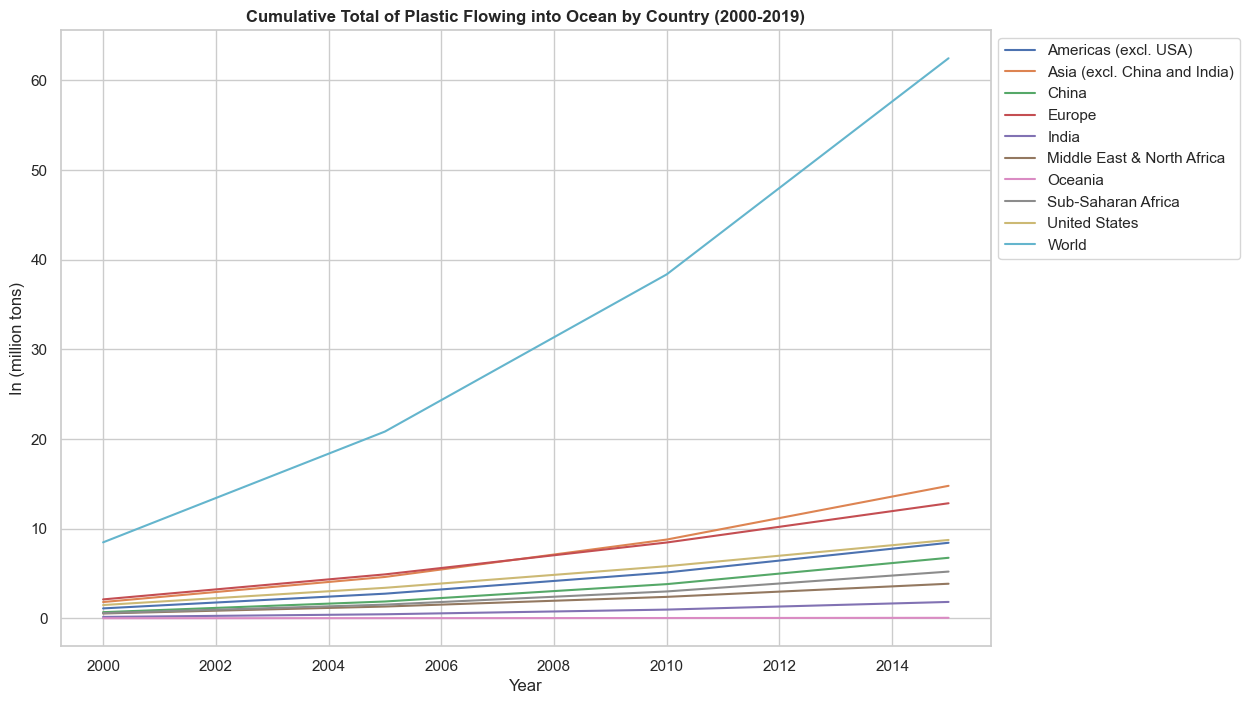

In [477]:
# Set the size of the chart
plt.figure(figsize=(12, 8))

# Filter the data for the years from 2000 to 2019 with a 5-year gap
filtered_df7 = df7[(df7['year'] >= 2000) & (df7['year'] <= 2019) & (((df7['year'] - 2000) / 5) % 1 == 0)]

# Calculate the cumulative total for each country in million tons
entities = filtered_df7['entity'].unique()
for entity in entities:
    entity_df = filtered_df7[filtered_df7['entity'] == entity]
    entity_df['cumulative_total'] = entity_df['plastic_waste_accumulated_in_ocean'].cumsum() / 1e6  # Convert to million tons
    plt.plot(entity_df['year'], entity_df['cumulative_total'], label=entity)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('In (million tons)')
plt.title('Cumulative Total of Plastic Flowing into Ocean by Country (2000-2019)', fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Show legend outside the plot

# Show the plot
plt.show()



In [478]:
filtered_df7.to_csv('plastic_waste_accumulated_oceans.csv', index=False)

## Eighth dataset : clean & EDA

In [496]:
# Exploring eighth dataset
explore_dataset(df8)

Shape of the dataset: (171, 4)


First few rows of the dataset:


,Entity,Code,Year,Mismanaged waste emitted to the ocean (metric tons year-1)
0,Africa,NaN,2019,78252
1,Albania,ALB,2019,1565
2,Algeria,DZA,2019,5774
3,Angola,AGO,2019,860
4,Antigua and Barbuda,ATG,2019,2




Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Entity                                                      171 non-null    object
 1   Code                                                        160 non-null    object
 2   Year                                                        171 non-null    int64 
 3   Mismanaged waste emitted to the ocean (metric tons year-1)  171 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.5+ KB


None



Duplicated values per column:


False



Number of duplicated values per column: 0


Missing values per column:


Entity                                                         0
Code                                                          11
Year                                                           0
Mismanaged waste emitted to the ocean (metric tons year-1)     0
dtype: int64



Number of unique values per column: 


entity                                                        171
code                                                          160
year                                                            1
mismanaged waste emitted to the ocean (metric tons year-1)    132
dtype: int64

In [497]:
# Let's drop the columns that are not relevant for our further analysis
df8.drop(columns=['code'], inplace=True)

In [498]:
# Keeping the main countries / continents
main_countries = ["Philippines", "India", "Malaysia", "China", "Indonesia", "Bangladesh", "United States", "EU-27"]

filtered_df8 = df8[df8['entity'].isin(main_countries)]

filtered_df8

,entity,year,mismanaged waste emitted to the ocean (metric tons year-1)
10,Bangladesh,2019,24640
25,China,2019,70707
38,EU-27,2019,2157
67,India,2019,126513
68,Indonesia,2019,56333
89,Malaysia,2019,73098
119,Philippines,2019,356371
163,United States,2019,2431


In [499]:
# Cleaning columns names
replace_column_name(filtered_df8, 'mismanaged waste emitted to the ocean (metric tons year-1)', 'plastic_waste_into_ocean')

/var/folders/h_/03_vf2y111g3s99jwp4qw0hm0000gn/T/ipykernel_5372/1518152295.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={old_column_name: new_column_name}, inplace=True)


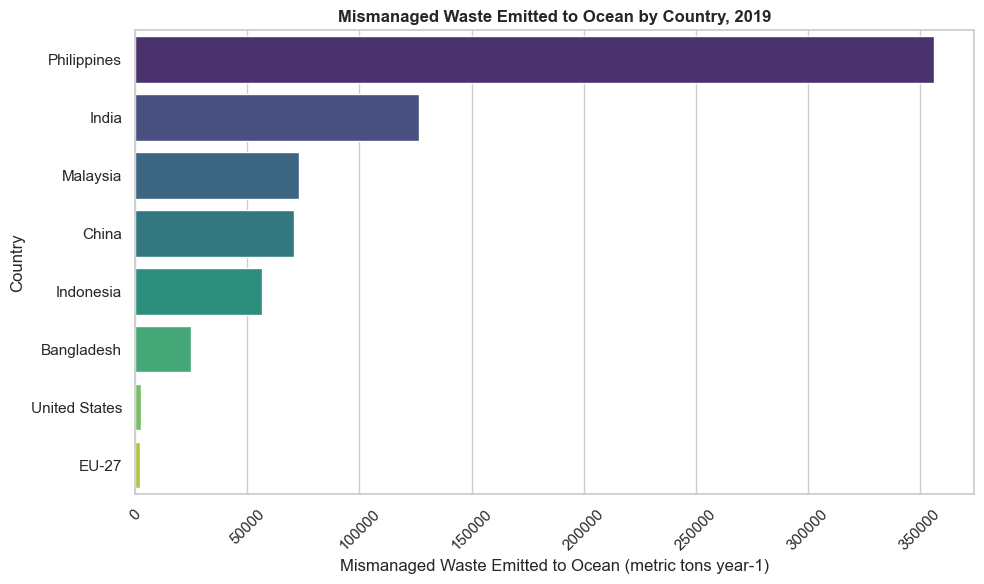

In [502]:
# Sort the data by descending order of mismanaged waste
sorted_data = sorted(zip(filtered_df8['entity'], filtered_df8['plastic_waste_into_ocean']), key=lambda x: x[1], reverse=True)
entities_sorted, values_sorted = zip(*sorted_data)

# Sort the DataFrame by descending order of values
df_sorted = filtered_df8.sort_values(by='plastic_waste_into_ocean', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='plastic_waste_into_ocean', y='entity', data=df_sorted, palette='viridis')
plt.xlabel('Mismanaged Waste Emitted to Ocean (metric tons year-1)')
plt.ylabel('Country')
plt.title('Mismanaged Waste Emitted to Ocean by Country, 2019', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [503]:
filtered_df8.to_csv('plastic_waste_into_ocean_by_country.csv', index=False)

## Ninth dataset : clean & EDA

In [517]:
# Exploring eighth dataset
explore_dataset(df9)

Shape of the dataset: (13, 4)


First few rows of the dataset:


,Entity,Code,Year,Decomposition rates of marine debris (years)
0,Aluminimum can,NaN,2018,200.0
1,Cigarette butt,NaN,2018,5.0
2,Disposable diaper,NaN,2018,450.0
3,Fishing line,NaN,2018,600.0
4,Foamed buoy,NaN,2018,50.0




Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        13 non-null     object 
 1   Code                                          0 non-null      float64
 2   Year                                          13 non-null     int64  
 3   Decomposition rates of marine debris (years)  12 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 548.0+ bytes


None



Duplicated values per column:


False



Number of duplicated values per column: 0


Missing values per column:


Entity                                           0
Code                                            13
Year                                             0
Decomposition rates of marine debris (years)     1
dtype: int64



Number of unique values per column: 


entity                                          13
code                                             0
year                                             1
decomposition rates of marine debris (years)     9
dtype: int64

In [518]:
# Let's drop the columns that are not relevant for our further analysis
df9.drop(columns=['code'], inplace=True)

In [519]:
# Cleaning columns names
replace_column_name(df9, 'entity', 'marine_debris_items')

In [520]:
# Drop rows with missing value
df9.dropna(subset=['decomposition rates of marine debris (years)'], inplace=True)


In [521]:
df9

,marine_debris_items,year,decomposition rates of marine debris (years)
0,Aluminimum can,2018,200.00
1,Cigarette butt,2018,5.00
2,Disposable diaper,2018,450.00
3,Fishing line,2018,600.00
4,Foamed buoy,2018,50.00
6,Photodegradable beverage holder,2018,0.50
7,Plastic bag,2018,20.00
8,Plastic beverage holder (six-rings),2018,400.00
9,Plastic bottle,2018,450.00
10,Syrofoam cup,2018,50.00


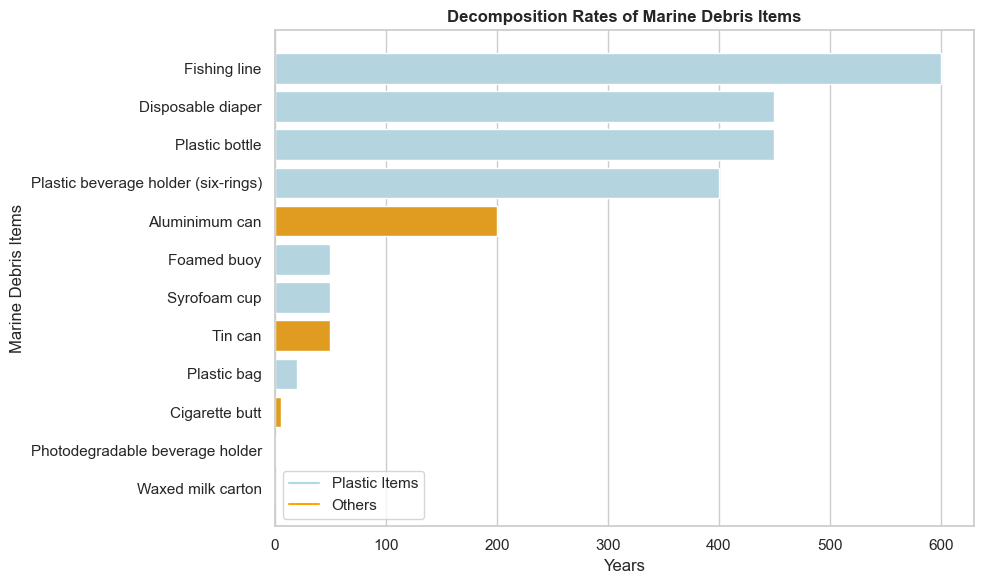

In [528]:
# Sort by descending years
df9 = df9.sort_values(by='decomposition rates of marine debris (years)', ascending=False)

# Assign color based on item
df9['color'] = 'lightblue'
items_to_color = ['Photodegradable beverage holder', 'Cigarette butt', 'Aluminimum can', 
                  'Tin can', 'Waxed milk carton']
df9.loc[df9['marine_debris_items'].isin(items_to_color), 'color'] = 'orange'

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='decomposition rates of marine debris (years)', y='marine_debris_items', 
            data=df9, palette=df9['color'])
plt.xlabel('Years')
plt.ylabel('Marine Debris Items')
plt.title('Decomposition Rates of Marine Debris Items', fontweight='bold')

# Create legend
plt.plot([], color='lightblue', label='Plastic Items')
plt.plot([], color='orange', label='Others')
plt.legend()

plt.tight_layout()
plt.show()

